<a href="https://colab.research.google.com/github/Dr-Isam-ALJAWARNEH/ds-project-ESDA/blob/15%2F04%2F24-Regression/spatial_join_sampling_thematic_maps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Geospatial Data Science Handbook***
- Author: Dr. Isam Al Jawarneh
- Copyright (c) [2024] [Isam Al Jawarneh]

https://towardsdatascience.com/data-101s-spatial-visualizations-and-analysis-in-python-with-folium-39730da2adf

https://github.com/justinm0rgan/citibike-heatmap

#Prepare: Install the needed packages

In [1]:
# Install Folium library for creating interactive maps
!pip install folium
# Install uszipcode library for accessing US ZIP Code data
!pip install uszipcode
# Install pygeohash library for encoding and decoding geographical coordinates into geohashes
%pip install pygeohash
# Install Geopandas library for working with geospatial data
!pip install geopandas


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 9.2 MB/s eta 0:00:00
  Created wheel for atomicwrites: filename=atomicwrites-1.4.1-py2.py3-none-any.whl size=6941 sha256=8ff7f7beaa4d25b65d7946d36d9f1c979db95fee4d8f57dd0437150e7c3d647a
  Stored in directory: /root/.cache/pip/wheels/34/07/0b/33b15f68736109f72ea0bb2499521d87312b932620737447a2
Successfully built atomicwrites
  Attempting uninstall: SQLAlchemy
    Found existing installation: SQLAlchemy 2.0.29
    Uninstalling SQLAlchemy-2.0.29:
      Successfully uninstalled SQLAlchemy-2.0.29
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython-sql 0.5.0 requires sqlalchemy>=2.0, but you have sqlalchemy 1.4

# Mount the drive

Mount the drive so that you can read the data from google drive

---



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import the Libraries

In [3]:
from pandas import Series, DataFrame # Import Series and DataFrame classes from pandas library
import pandas as pd # Import pandas library with alias pd
import numpy as np # Import numpy library with alias np
import plotly.graph_objs as go # Import graph objects module from plotly library with alias go
from IPython.display import Image # Import Image class from IPython.display module
import folium # Import folium library for creating interactive maps
from folium import IFrame # Import IFrame class from folium library
from folium.plugins import MarkerCluster # Import MarkerCluster plugin from folium.plugins module
from folium import plugins # Import plugins module from folium library
from datetime import datetime # Import datetime class from datetime module
import datetime as dt # Import datetime module with alias dt
import json # Import json module for working with JSON data
from scipy import stats # Import stats module from scipy library
import os # Import os module for interacting with the operating system
import matplotlib.pyplot as plt
import seaborn as sns

# CONFIG: Sampling Parameters

In [4]:
sampling_fraction = 0.6
geohash_precision = 6

# Loading Data & Analysis: Mobility Data

In [5]:
# Read the CSV file into a pandas DataFrame named "trips"
trips = pd.read_csv("/content/drive/MyDrive/Found. of DS Project/nyc_mobility/nyc1.csv")


In [6]:
#directoryPath = "/content/drive/MyDrive/Papers/dimensionality_reduction/datasets/NYC/trips/"

In [7]:
#Merge Multiple CSV Files in Python

In [8]:
'''file_path_1 ='/content/drive/MyDrive/Papers/dimensionality_reduction/datasets/NYC/pollution/NYC_Pilot1_PM.csv'
file_path_2 = "/content/drive/MyDrive/Papers/dimensionality_reduction/datasets/NYC/pollution/NYC_Pilot2_PM_Part1.csv"
file_path_3 = "/content/drive/MyDrive/Papers/dimensionality_reduction/datasets/NYC/pollution/NYC_Pilot2_PM_Part2.csv"
file_path_4 = "/content/drive/MyDrive/Papers/dimensionality_reduction/datasets/NYC/pollution/NYC_Pilot2_PM_Part3.csv"'''

'file_path_1 =\'/content/drive/MyDrive/Papers/dimensionality_reduction/datasets/NYC/pollution/NYC_Pilot1_PM.csv\'\nfile_path_2 = "/content/drive/MyDrive/Papers/dimensionality_reduction/datasets/NYC/pollution/NYC_Pilot2_PM_Part1.csv"\nfile_path_3 = "/content/drive/MyDrive/Papers/dimensionality_reduction/datasets/NYC/pollution/NYC_Pilot2_PM_Part2.csv"\nfile_path_4 = "/content/drive/MyDrive/Papers/dimensionality_reduction/datasets/NYC/pollution/NYC_Pilot2_PM_Part3.csv"'

In [9]:
'''import pandas as pd
files = [file_path_1, file_path_2,file_path_3,file_path_4]
trips = pd.DataFrame()
for file in files:
    data = pd.read_csv(file)
    trips = pd.concat([trips, data], axis=0)
#df.to_csv('nyc_pollution.csv', index=False)'''

"import pandas as pd\nfiles = [file_path_1, file_path_2,file_path_3,file_path_4]\ntrips = pd.DataFrame()\nfor file in files:\n    data = pd.read_csv(file)\n    trips = pd.concat([trips, data], axis=0)\n#df.to_csv('nyc_pollution.csv', index=False)"

In [10]:
# Return the type of the dataframe trips
type(trips)

pandas.core.frame.DataFrame

In [11]:
# Retrive the number of rows and number of columns in the dataframe trip
trips.shape

(1445285, 22)

In [12]:
# Retrieve the first 2 rows of the DataFrame trips to inspect its structure and content
trips.head(2)

,id,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,...,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
0,0,2,2016-01-01 00:29:24,2016-01-01 00:39:36,N,1,-73.928642,40.680611,-73.924278,40.698044,...,8.0,0.5,0.5,1.86,0.0,NaN,0.3,11.16,1,1.0
1,1,2,2016-01-01 00:19:39,2016-01-01 00:39:18,N,1,-73.952675,40.723175,-73.923920,40.761379,...,15.5,0.5,0.5,0.00,0.0,NaN,0.3,16.80,2,1.0


In [13]:
'''import glob
import pandas as pd

trips = pd.DataFrame()
for file_name in glob.glob(directoryPath+'*.csv'):
    x = pd.read_csv(file_name, low_memory=False)
    trips = pd.concat([trips,x],axis=0)'''
    #this is for multiple files

"import glob\nimport pandas as pd\n\ntrips = pd.DataFrame()\nfor file_name in glob.glob(directoryPath+'*.csv'):\n    x = pd.read_csv(file_name, low_memory=False)\n    trips = pd.concat([trips,x],axis=0)"

In [14]:
# Retrieve the number of columns in the DataFrame trips
columns=trips.shape[1]
print(columns)

# Retrieve the number of rows in the DataFrame trips
rows=trips.shape[0]
print(rows)

22
1445285


Convert datetime object column to datetime series

In [15]:
'''trips['time'] = pd.to_datetime(\
                trips['time'],dayfirst = True)
trips['time'] = pd.to_datetime(\
                trips['time'],dayfirst = True)'''


"trips['time'] = pd.to_datetime(                trips['time'],dayfirst = True)\ntrips['time'] = pd.to_datetime(                trips['time'],dayfirst = True)"

add columns month, time, day

# Remove erroneous coordinates (0,0) from the dataset - Mobility Data


In [16]:
# Rename the 'Pickup_longitude' column to 'longitude'
# Rename 'Pickup_latitude' column to 'latitude' in the DataFrame trips
# The 'inplace=True' parameter ensures that the changes are applied to the DataFrame itself
trips.rename(columns={'Pickup_longitude':'longitude', 'Pickup_latitude':'latitude'}, inplace=True)

In [17]:
# Filter the DataFrame trips to remove rows where the latitude is 0 and longitude is 0
trips = trips[(trips['latitude'] != 0 ) & (trips['longitude']!=0 )]

### Check the size before and after the filter

In [18]:
#Before the filter
print("Before filtering:", rows)

#After the filter
rows2=trips.shape[0]
print("After filtering: ", rows2)

Before filtering: 1445285
After filtering:  1442776


# Geohash - Mobility Data

### Import the libraries

In [19]:
!pip install pygeohash

In [20]:
import pygeohash as gh  # Import pygeohash library with alias gh for encoding and decoding geographic coordinates into geohashes
import geopandas as gpd  # Import the geopandas library with alias gpd for working with geospatial data

### Generate geohash for each tuple (long, lat)

In [21]:
# Measure the execution time of the code within this cell
%%time

# Encode latitude and longitude coordinates into geohashes and assign them to a new column 'geohash' in the DataFrame trips
# The lambda function applies the encoding operation to each row of the DataFrame using the specified geohash precision
trips['geohash'] = trips.apply(lambda x: gh.encode(x.latitude, x.longitude, precision=geohash_precision), axis=1)


CPU times: user 54.8 s, sys: 1.49 s, total: 56.3 s
Wall time: 1min 10s


In [22]:
print(trips.geohash)

0          dr5rmt
1          dr5rtj
2          dr5rks
3          dr5rk7
4          dr5rky
            ...  
1445280    dr5x83
1445281    dr5rt5
1445282    dr5rtn
1445283    dr72jn
1445284    dr5ry9
Name: geohash, Length: 1442776, dtype: object


In [23]:
print(trips.Dropoff_longitude[4])

-73.94071960449219


In [24]:
# Measure the average execution time of the trips.head(2) operation
%timeit trips.head(2)

29.1 µs ± 6.96 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [25]:
# Display number of rows
trips.shape[0]

1442776

In [26]:
# Display the first 2 rows
trips.head(2)

,id,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,longitude,latitude,Dropoff_longitude,Dropoff_latitude,...,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type,geohash
0,0,2,2016-01-01 00:29:24,2016-01-01 00:39:36,N,1,-73.928642,40.680611,-73.924278,40.698044,...,0.5,0.5,1.86,0.0,NaN,0.3,11.16,1,1.0,dr5rmt
1,1,2,2016-01-01 00:19:39,2016-01-01 00:39:18,N,1,-73.952675,40.723175,-73.923920,40.761379,...,0.5,0.5,0.00,0.0,NaN,0.3,16.80,2,1.0,dr5rtj


### Convert trips to GeoPandas

In [27]:
# Return the type of the dataframe trip
type(trips)

pandas.core.frame.DataFrame

In [28]:
# Convert to Geopandas Geodataframe
%%time

# Create a GeoDataFrame gdf_trips from the DataFrame trips, specifying the geometry column using longitude and latitude coordinates
gdf_trips = gpd.GeoDataFrame(trips, geometry=gpd.points_from_xy(trips.longitude, trips.latitude))

CPU times: user 2.63 s, sys: 304 ms, total: 2.93 s
Wall time: 3 s


In [29]:
#gdf2_trips = gpd.GeoDataFrame(trips, geometry=0)

In [30]:
# Determine the type of object represented by the variable gdf_trips
type(gdf_trips)

geopandas.geodataframe.GeoDataFrame

In [31]:
# Print the Coordinate Reference System (CRS) of the GeoDataFrame gdf_trips
#gdf_trips.head(2)
print(gdf_trips.crs)


None


In [32]:
# RUN the cell before
# Sample a fraction of the GeoDataFrame gdf_trips
# The sampling fraction determines the proportion of rows to be randomly sampled from the GeoDataFrame

gdf_trips=gdf_trips.sample(frac=sampling_fraction) # sampling_fraction = 0.6

In [33]:
trips.head(1)

,id,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,longitude,latitude,Dropoff_longitude,Dropoff_latitude,...,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type,geohash
0,0,2,2016-01-01 00:29:24,2016-01-01 00:39:36,N,1,-73.928642,40.680611,-73.924278,40.698044,...,0.5,0.5,1.86,0.0,NaN,0.3,11.16,1,1.0,dr5rmt


In [34]:
gdf_trips.head(1)

,id,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,longitude,latitude,Dropoff_longitude,Dropoff_latitude,...,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type,geohash,geometry
1303144,1303144,2,2016-01-29 18:35:27,2016-01-29 18:48:53,N,1,-73.943787,40.835793,-73.96772,40.801594,...,0.5,2.0,0.0,NaN,0.3,19.8,1,1.0,dr72m3,POINT (-73.94379 40.83579)


In [35]:
print(gdf_trips)

              id  VendorID lpep_pickup_datetime Lpep_dropoff_datetime  \
1303144  1303144         2  2016-01-29 18:35:27   2016-01-29 18:48:53   
190628    190628         2  2016-01-04 20:01:32   2016-01-04 20:11:49   
751027    751027         2  2016-01-16 18:40:15   2016-01-16 18:52:02   
1073135  1073135         2  2016-01-24 14:53:35   2016-01-24 15:00:39   
1115852  1115852         2  2016-01-25 17:02:53   2016-01-25 17:21:11   
...          ...       ...                  ...                   ...   
420247    420247         1  2016-01-09 19:37:01   2016-01-09 19:48:02   
812124    812124         1  2016-01-17 18:32:55   2016-01-17 18:43:37   
781468    781468         1  2016-01-17 02:46:51   2016-01-17 02:54:48   
1339838  1339838         2  2016-01-30 04:24:56   2016-01-30 04:27:50   
585642    585642         1  2016-01-13 13:52:51   2016-01-13 14:02:41   

        Store_and_fwd_flag  RateCodeID  longitude   latitude  \
1303144                  N           1 -73.943787  40.83579

<Axes: >

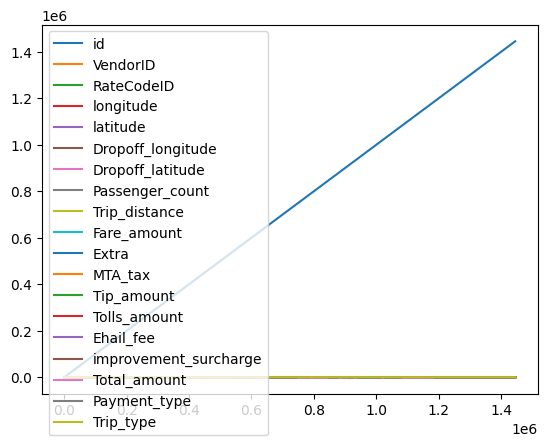

In [36]:
trips.plot()

<Axes: >

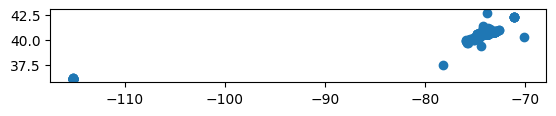

In [37]:
gdf_trips.plot()

In [38]:
# Print the Coordinate Reference System (CRS) of the GeoDataFrame gdf_trips - after the sampling (it should stay the same)
print(gdf_trips.crs)

None


In [39]:
# The CRS for trips should remain geographic 4326
gdf_trips = gdf_trips.set_crs('epsg:4326')
print(gdf_trips)

              id  VendorID lpep_pickup_datetime Lpep_dropoff_datetime  \
1303144  1303144         2  2016-01-29 18:35:27   2016-01-29 18:48:53   
190628    190628         2  2016-01-04 20:01:32   2016-01-04 20:11:49   
751027    751027         2  2016-01-16 18:40:15   2016-01-16 18:52:02   
1073135  1073135         2  2016-01-24 14:53:35   2016-01-24 15:00:39   
1115852  1115852         2  2016-01-25 17:02:53   2016-01-25 17:21:11   
...          ...       ...                  ...                   ...   
420247    420247         1  2016-01-09 19:37:01   2016-01-09 19:48:02   
812124    812124         1  2016-01-17 18:32:55   2016-01-17 18:43:37   
781468    781468         1  2016-01-17 02:46:51   2016-01-17 02:54:48   
1339838  1339838         2  2016-01-30 04:24:56   2016-01-30 04:27:50   
585642    585642         1  2016-01-13 13:52:51   2016-01-13 14:02:41   

        Store_and_fwd_flag  RateCodeID  longitude   latitude  \
1303144                  N           1 -73.943787  40.83579

In [40]:
# Display the shape of the GeoDataFrame gdf_trips
gdf_trips.shape

(865666, 24)

In [41]:
# Display the first 2 rows of the GeoDataFrame gdf_trips
gdf_trips.head(2)

,id,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,longitude,latitude,Dropoff_longitude,Dropoff_latitude,...,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type,geohash,geometry
1303144,1303144,2,2016-01-29 18:35:27,2016-01-29 18:48:53,N,1,-73.943787,40.835793,-73.967720,40.801594,...,0.5,2.0,0.0,NaN,0.3,19.8,1,1.0,dr72m3,POINT (-73.94379 40.83579)
190628,190628,2,2016-01-04 20:01:32,2016-01-04 20:11:49,N,1,-73.951546,40.790882,-73.956268,40.813213,...,0.5,0.0,0.0,NaN,0.3,10.3,2,1.0,dr72j1,POINT (-73.95155 40.79088)


it additionally trips now has the geometry column

### Convert polygons to GeoPandas

In [42]:
# BASELINE: original Neighbourhoods

# Define the file path to the GeoJSON file containing NYC neighborhood polygons
geojson_file = "/content/drive/MyDrive/Found. of DS Project/nyc_polygon.geojson"

# Read the GeoJSON file and create a GeoDataFrame named neighborhoods_original
neighborhoods_original = gpd.read_file(geojson_file)

In [43]:
# Display the shape of the GeoDataFrame neighborhoods_original (rows, columns)
neighborhoods_original.shape

(310, 5)

In [44]:
# Display the first 2 rows of the GeoDataFrame neighborhoods_original
neighborhoods_original.head(2)

,neighborhood,boroughCode,borough,@id,geometry
0,Allerton,2,Bronx,http://nyc.pediacities.com/Resource/Neighborho...,"POLYGON ((-73.84860 40.87167, -73.84582 40.870..."
1,Alley Pond Park,4,Queens,http://nyc.pediacities.com/Resource/Neighborho...,"POLYGON ((-73.74333 40.73888, -73.74371 40.739..."


In [45]:
# Display the first 2 rows of the GeoDataFrame gdf_trips
gdf_trips.head(2)

,id,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,longitude,latitude,Dropoff_longitude,Dropoff_latitude,...,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type,geohash,geometry
1303144,1303144,2,2016-01-29 18:35:27,2016-01-29 18:48:53,N,1,-73.943787,40.835793,-73.967720,40.801594,...,0.5,2.0,0.0,NaN,0.3,19.8,1,1.0,dr72m3,POINT (-73.94379 40.83579)
190628,190628,2,2016-01-04 20:01:32,2016-01-04 20:11:49,N,1,-73.951546,40.790882,-73.956268,40.813213,...,0.5,0.0,0.0,NaN,0.3,10.3,2,1.0,dr72j1,POINT (-73.95155 40.79088)


### Spatial Analysis and Join Operations with GeoDataFrames
Keeping geometry column from both dataframes when applying sjoin() using GeoPandas
this is so because later on we group by NAME(district in Shenzhen)
also, the CRS (coordinate reference system) is 3857 in this case which is a projected CRS not geographic CRS, to calculate the distance corercctly between centroids
https://gis.stackexchange.com/questions/393387/keeping-geometry-column-from-both-dataframes-when-applying-sjoin-using-geopand

In [46]:
# Convert the geometry column to EPSG:3857 CRS for accurate spatial analysis.
neighborhoods_original['geometryn'] = neighborhoods_original.geometry.to_crs("epsg:3857")

In [47]:
# Retrieve the coordinate reference system (CRS) information from the GeoDataFrame gdf_trips
gdf_trips.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [48]:
# Retrieve the coordinate reference system (CRS) information from the GeoDataFrame neighborhoods_original
neighborhoods_original.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [49]:
# Retrieve the coordinate reference system (CRS) information from the 'geometryn' column of the GeoDataFrame neighborhoods_original
neighborhoods_original.geometryn.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [50]:
%%time
# Perform a spatial join between gdf_trips and neighborhoods_original, considering trips that are within neighborhood polygons.

#BASELINE
# we join by sjoin, but we have geohash so, we sample stratified by geohash
# so, we join only to get the metrics but the stratified sampling is based on the fine-grained division (geohash in this case)

# Store the result of the spatial join in the variable sjoined_trips_original.
sjoined_trips_original = gpd.sjoin(gdf_trips, neighborhoods_original, predicate="within")

CPU times: user 7.9 s, sys: 851 ms, total: 8.75 s
Wall time: 8.82 s


In [51]:
# Display the first 2 rows of the resulting GeoDataFrame.
sjoined_trips_original.head(2)

,id,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,longitude,latitude,Dropoff_longitude,Dropoff_latitude,...,Payment_type,Trip_type,geohash,geometry,index_right,neighborhood,boroughCode,borough,@id,geometryn
1303144,1303144,2,2016-01-29 18:35:27,2016-01-29 18:48:53,N,1,-73.943787,40.835793,-73.967720,40.801594,...,1,1.0,dr72m3,POINT (-73.94379 40.83579),295,Washington Heights,1,Manhattan,http://nyc.pediacities.com/Resource/Neighborho...,"POLYGON ((-8228992.544 4991065.783, -8229189.6..."
920214,920214,2,2016-01-20 11:35:39,2016-01-20 11:48:10,N,1,-73.940773,40.851357,-73.970596,40.788597,...,2,1.0,dr72mk,POINT (-73.94077 40.85136),295,Washington Heights,1,Manhattan,http://nyc.pediacities.com/Resource/Neighborho...,"POLYGON ((-8228992.544 4991065.783, -8229189.6..."


In [52]:
# Retrieve the type of the variable sjoined_trips_original, indicating the data type of the object it refers to.
type(sjoined_trips_original)

geopandas.geodataframe.GeoDataFrame

In [53]:
# Counting unique values
n = len(pd.unique(sjoined_trips_original['neighborhood']))
print("No.of.unique name values :", n)

No.of.unique name values : 213


In [54]:
# Retrieve the shape of the sjoined_trips_original GeoDataFrame, which indicates the number of rows and columns in the dataset.
sjoined_trips_original.shape

(864931, 30)

In [55]:
# Retrieve the data types of columns in the sjoined_trips_original GeoDataFrame, indicating the data type of each attribute or column.
sjoined_trips_original.dtypes

id                          int64
VendorID                    int64
lpep_pickup_datetime       object
Lpep_dropoff_datetime      object
Store_and_fwd_flag         object
RateCodeID                  int64
longitude                 float64
latitude                  float64
Dropoff_longitude         float64
Dropoff_latitude          float64
Passenger_count             int64
Trip_distance             float64
Fare_amount               float64
Extra                     float64
MTA_tax                   float64
Tip_amount                float64
Tolls_amount              float64
Ehail_fee                 float64
improvement_surcharge     float64
Total_amount              float64
Payment_type                int64
Trip_type                 float64
geohash                    object
geometry                 geometry
index_right                 int64
neighborhood               object
boroughCode                object
borough                    object
@id                        object
geometryn     

# SAMPLING AND MAP GENERATION

### SAMPLING - PERFORMANCE

###  Sampling by Geohash with Variable Sampling Fraction

In [ ]:
%%time
# Sampling by geohash change fraction sampling rate
# Group the spatially joined data 'sjoined_trips_original' by neighborhood
# Then within each neighborhood group, sample a fraction of the data based on the specified 'sampling_fraction'.

sampled_geohash_data_base= sjoined_trips_original.groupby('neighborhood').apply(lambda x: x.sample(frac=sampling_fraction)) #sampling_fraction = 0.6
# The resulting sampled data is stored in the 'sampled_geohash_data_base' variable.

In [ ]:
# Retrieve the shape of the sampled_geohash_data_base DataFrame, indicating the number of rows and columns in the dataset.
sampled_geohash_data_base.shape

In [ ]:
# Print the first two rows
sampled_geohash_data_base.head(2)

In [ ]:
# Print the column names of the sampled_geohash_data_base DataFrame, showing the attributes present in the dataset.
print(sampled_geohash_data_base.columns)

In [ ]:
#take only readings greater than specific threshold to count reading in each polygon greater than that threshold
#sampled_geohash_data_base = sampled_geohash_data_base[sampled_geohash_data_base.pm25>= 3 ]

In [ ]:
# counting unique values
n = len(pd.unique(sampled_geohash_data_base['neighborhood']))
print("No.of.unique name values :", n)

### Sampling Entire Fractions of Grouped Data by Neighborhood

In [ ]:
%%time
# Original

# Group the spatially joined data 'sjoined_trips_original' by neighborhood, then within each neighborhood group, sample the entire fraction of the data (frac=1).
sampled_geohash_data_original = sjoined_trips_original.groupby('neighborhood').apply(lambda x: x.sample(frac=1))
# The resulting sampled data is stored in the 'sampled_geohash_data_original' variable

In [ ]:
# Retrieve the shape of the sampled_geohash_data_base DataFrame, indicating the number of rows and columns in the dataset.
sampled_geohash_data_original.shape

In [ ]:
# Print the first two rows
sampled_geohash_data_original.head(2)

In [ ]:
# Print the column names of the sampled_geohash_data_original DataFrame, showing the attributes present in the dataset.
print(sampled_geohash_data_original.columns)

In [ ]:
# Counting unique values
n = len(pd.unique(sampled_geohash_data_original['neighborhood']))
print("No.of.unique name values :", n)

In [ ]:
# Sampling by Geohash with Variable Sampling Fraction
sampled_geohash_data_base.shape

In [ ]:
# Sampling Entire Fractions of Grouped Data by Neighborhood
sampled_geohash_data_original.shape

### END SAMPLING

### Choropleth Maps
Choropleth maps are thematic maps where areas (such as regions, countries, or administrative boundaries) are shaded or patterned in proportion to the value of a variable being represented.

In [ ]:
# Sampled data scenario #2
# Sampling by Geohash with Variable Sampling Fraction

# Compute the frequency of occurrences of each unique value in the 'neighborhood' column of the 'sampled_geohash_data_base' DataFrame
shenzhen_taxi_pickup_sample2= sampled_geohash_data_base['neighborhood'].value_counts() # The result is stored in 'shenzhen_taxi_pickup_sample2'

# Reset the index of the 'shenzhen_taxi_pickup_sample2', converting the current index into a new column.
shenzhen_taxi_pickup_sample2 = shenzhen_taxi_pickup_sample2.reset_index()

# Rename the columns of the 'shenzhen_taxi_pickup_sample2' DataFrame to 'neighborhood' and 'count'
shenzhen_taxi_pickup_sample2.columns = ['neighborhood','count']

# Convert the 'neighborhood' column of the 'shenzhen_taxi_pickup_sample2' DataFrame to string type
shenzhen_taxi_pickup_sample2['neighborhood'] = shenzhen_taxi_pickup_sample2['neighborhood'].astype(str)

In [ ]:
# Original data

# Compute the frequency of occurrences of each unique value in the 'neighborhood' column of the 'sjoined_trips_original' DataFrame
shenzhen_taxi_pickup_original= sjoined_trips_original['neighborhood'].value_counts() # The result is stored in 'shenzhen_taxi_pickup_original'.

# Reset the index of the 'shenzhen_taxi_pickup_original' Series/DataFrame,  converting the current index into a new column.
shenzhen_taxi_pickup_original = shenzhen_taxi_pickup_original.reset_index()

# Rename the columns of the 'shenzhen_taxi_pickup_original' DataFrame to 'neighborhood' and 'count'.
shenzhen_taxi_pickup_original.columns = ['neighborhood','count']

# Convert the 'neighborhood' column of the 'shenzhen_taxi_pickup_original' DataFrame to string type.
shenzhen_taxi_pickup_original['neighborhood'] = shenzhen_taxi_pickup_original['neighborhood'].astype(str)

In [ ]:
# Display the first 6 rows of the Shenzhen_taxi_pickup_original
shenzhen_taxi_pickup_original.head(6)

In [ ]:
# Create a choropleth map visualizing the distribution of taxi pickups across neighborhoods in Shenzhen - using original data

# Reference geo-map
shenzhen_taxi_pickup_original["neighborhood"].astype(str)

# Define the file path to the GeoJSON file containing neighborhood polygons
geo_path = r'/content/drive/MyDrive/Found. of DS Project/nyc_polygon.geojson'

# Define the scale for the heatmap based on specified threshold percentages
heatmap_scale = list()
threshold = [10,20,50,70,85,100]

for i in threshold :
    heatmap_scale.append(int(shenzhen_taxi_pickup_original['count'].max() * (i/100.0)))

# Initialize a Folium map centered on Shenzhen with a specified zoom level
map_shenzhen_taxi_pickup_sample = folium.Map(location=[40.730610, -73.935242], zoom_start=10)

# Create a choropleth layer on the Folium map using GeoJSON data and pickup count data
map_shenzhen_taxi_pickup_sample.choropleth(geo_data=geo_path, data=shenzhen_taxi_pickup_original, \
                data_out = 'nyc_zip_test.json',
             columns=['neighborhood', 'count'],
             #threshold_scale= heatmap_scale,
             key_on='feature.properties.neighborhood',
             fill_color='YlOrRd', fill_opacity=0.9, line_opacity=0.9,nan_fill_color='white',
             legend_name='Number of Pickups')

In [ ]:
# Display the choropleth map generated using Folium
map_shenzhen_taxi_pickup_sample

In [ ]:
# Create a choropleth map visualizing the distribution of taxi pickups across neighborhoods in Shenzhen - using sampled data (variable sampling fraction)

# Base geo-map (without Douglas Algorithm)

# Reference geo-map
shenzhen_taxi_pickup_sample2["neighborhood"].astype(str)

# Define the file path to the GeoJSON file containing neighborhood polygons
geo_path = r'/content/drive/MyDrive/Found. of DS Project/nyc_polygon.geojson'

# Define the scale for the heatmap based on specified threshold percentages
heatmap_scale = list()
threshold = [10,20,50,70,85,100]
for i in threshold :
    heatmap_scale.append(int(shenzhen_taxi_pickup_sample2['count'].max() * (i/100.0)))

# Initialize a Folium map centered on Shenzhen with a specified zoom level
map_shenzhen_taxi_pickup_sample = folium.Map(location=[40.730610, -73.935242], zoom_start=10)

# Create a choropleth layer on the Folium map using GeoJSON data and pickup count data
map_shenzhen_taxi_pickup_sample.choropleth(geo_data=geo_path, data=shenzhen_taxi_pickup_sample2, \
                data_out = 'nyc_zip_test.json',
             columns=['neighborhood', 'count'],
             #threshold_scale= heatmap_scale,
             key_on='feature.properties.neighborhood',
             fill_color='YlOrRd', fill_opacity=0.9, line_opacity=0.9,nan_fill_color='white',
             legend_name='Number of Pickups')

fill_color (string, optional) – Area fill color, defaults to blue. Can pass a hex code, color name, or if you are binding data, one of the following color brewer palettes: ‘BuGn’, ‘BuPu’, ‘GnBu’, ‘OrRd’, ‘PuBu’, ‘PuBuGn’, ‘PuRd’, ‘RdPu’, ‘YlGn’, ‘YlGnBu’, ‘YlOrBr’, and ‘YlOrRd’.

In [ ]:
# Display the choropleth map generated using Folium
map_shenzhen_taxi_pickup_sample

### END Choropleth Map generation

### Heatmap
A heatmap is a graphical representation of data in which values are depicted using a range of colors

### Heatmap (Longitude and Latitude Vs.	Count)
A heatmap is a graphical representation of data in which values are depicted using a range of colors

In [ ]:
# Import the HeatMap class from the folium.plugins module
from folium.plugins import HeatMap

In [ ]:
# Display the data types of each column in the DataFrame sjoined_trips_original
sjoined_trips_original.dtypes

In [ ]:
# Group the data by neighborhood, aggregating longitude and latitude values while counting the occurrences of each neighborhood
heatmap_data = sjoined_trips_original[['longitude','latitude','neighborhood']].groupby(['neighborhood'], as_index=False).agg({'longitude': 'first', 'latitude': 'first','neighborhood':'count'})


In [ ]:
# Rename the 'neighborhood' column to 'count' in the DataFrame heatmap_data
heatmap_data.rename(columns={'neighborhood': 'count'}, inplace=True)

In [ ]:
# Sort the DataFrame heatmap_data by the 'count' column in descending order
new_heatmap_data = heatmap_data.sort_values(by='count', ascending=False) # The result is stored in new_heatmap_data

In [ ]:
# Display the first two rows of the new_heatmap_data
new_heatmap_data.head(2)

In [ ]:
# Convert the DataFrame new_heatmap_data to a list
heatmap_data1 = new_heatmap_data.values.tolist()

In [ ]:
# Display the data types of columns in the DataFrame trips
trips.dtypes

In [ ]:
# Assigning a value of 1 to a new column 'count' in the DataFrame trips - 1 is added to each row in the column
trips['count'] = 1

In [ ]:
# Randomly sample 10,000 rows from the 'trips' DataFrame, selecting only the columns 'latitude', 'longitude', and 'count' for each sampled row
trips[['latitude', 'longitude', 'count']].sample(n=10000)

In [ ]:
# Calculate the length of the list obtained after grouping the sampled trips DataFrame by latitude and longitude, summing up the counts, and converting it to a list of values
len(trips[['latitude', 'longitude', 'count']].sample(n=10000).groupby(['latitude', 'longitude']).sum().reset_index().values.tolist())

In [ ]:
# Define a function to generate a base map using Folium with default location and zoom level
def generateBaseMap(default_location=[40.7306, -73.935], default_zoom_start=11):

    # Create a Folium map with the specified default location and zoom level
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)

    # Return the generated base map
    return base_map


In [ ]:
# Generate a base map using the generateBaseMap function
base_map = generateBaseMap()

# Create a HeatMap layer using the sampled data and add it to the base map
HeatMap(data=trips[['latitude', 'longitude', 'count']].sample(n=10000).groupby(['latitude', 'longitude']).sum().reset_index().values.tolist(),
        radius=8, max_zoom=13).add_to(base_map)

In [ ]:
# Display the base map with the HeatMap layer
base_map

In [ ]:
# Add a click-for-marker functionality to the base map
base_map.add_child(folium.ClickForMarker(popup='Potential Location'))


### Heatmap (Longitude and	Latitude Vs. Total Amount)

In [ ]:
# Select a random sample of 10,000 rows from the 'trips' DataFrame including only 'latitude', 'longitude', and 'Total_amount' in the sample
trips[['latitude', 'longitude', 'Total_amount']].sample(n=10000)

In [ ]:
# Calculate the length of the list obtained by grouping the sampled data by latitude and longitude, summing the 'Total_amount' for each group, resetting the index, and converting to a list of values
len(trips[['latitude', 'longitude', 'Total_amount']].sample(n=10000).groupby(['latitude', 'longitude']).sum().reset_index().values.tolist())

In [ ]:
# Displaying heatmap of longitute and latitude vs total amount
base_map2 = generateBaseMap()
HeatMap(data=trips[['latitude', 'longitude', 'Total_amount']].sample(n=10000).groupby(['latitude', 'longitude']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(base_map2)
base_map2


In [ ]:
# Add a click-for-marker functionality to the base map
base_map2.add_child(folium.ClickForMarker(popup='Potential Location'))

### Heatmap (Longitude and	Latitude Vs. Trip Distance)

In [ ]:
# Sample 10,000 rows from the DataFrame 'trips', selecting the columns 'latitude', 'longitude', and 'Trip_distance'
trips[['latitude', 'longitude', 'Trip_distance']].sample(n=10000)

In [ ]:
# Count the number of unique latitude and longitude pairs after sampling 10,000 rows from the DataFrame 'trips' and grouping by latitude and longitude, considering the 'Trip_distance' column.
len(trips[['latitude', 'longitude', 'Trip_distance']].sample(n=10000).groupby(['latitude', 'longitude']).sum().reset_index().values.tolist())

In [ ]:
# Displaying heat map of longitute and latitude vs trip distance
base_map3 = generateBaseMap()
HeatMap(data=trips[['latitude', 'longitude', 'Trip_distance']].sample(n=10000).groupby(['latitude', 'longitude']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(base_map3)
base_map3

### Heatmap (Longitude and Latitude Vs. Tolls_amount)

In [ ]:
# Sample 10,000 rows from the 'trips' DataFrame, selecting the 'latitude', 'longitude', and 'Tolls_amount' columns.
trips[['latitude', 'longitude', 'Tolls_amount']].sample(n=10000)

In [ ]:
# This code calculates the number of unique latitude-longitude combinations after sampling 10,000 rows from the 'trips' DataFrame and grouping them by latitude and longitude while summing the 'Tolls_amount' for each group.
len(trips[['latitude', 'longitude', 'Tolls_amount']].sample(n=10000).groupby(['latitude', 'longitude']).sum().reset_index().values.tolist())

In [ ]:
# Displaying heat map of longitute and latitude vs tolls amount
base_map4 = generateBaseMap()
HeatMap(data=trips[['latitude', 'longitude', 'Tolls_amount']].sample(n=10000).groupby(['latitude', 'longitude']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(base_map4)
base_map4

# Loading Data & Analysis: Air Quality Data

In [56]:
# Read the CSV file into a pandas DataFrame named "trips"
air_quality = pd.read_csv("/content/drive/MyDrive/Found. of DS Project/NYC_air_quality.csv")

In [57]:
# Return the type of the dataframe air_quality
type(air_quality)

pandas.core.frame.DataFrame

In [58]:
# Retrive the number of rows and number of columns in the dataframe air_quality
air_quality.shape

(169999, 31)

In [59]:
# Retrieve the first 2 rows of the DataFrame air_quality to inspect its structure and content
air_quality.head(2)

,SensorID,time,latitude,longitude,bin0,bin1,bin2,bin3,bin4,bin5,...,bin17,bin18,bin19,bin20,bin21,bin22,bin23,temperature,humidity,pm25
0,NYCP2_CS01A,1631277304,40.847672,-73.869316,11,1,1,0,0,0,...,0,0,0,0,0,0,0,23.7,57.3,4.508813
1,NYCP2_CS01A,1631277308,40.847668,-73.869316,22,4,1,0,0,2,...,0,0,0,0,0,0,0,23.7,57.8,5.462420


In [60]:
# Retrieve the number of columns in the DataFrame air_quality
columns=air_quality.shape[1]
print(columns)

# Retrieve the number of rows in the DataFrame air_quality
rows_air_quality=air_quality.shape[0]
print(rows_air_quality)

31
169999


# Remove erroneous coordinates (0,0) from the dataset - Air Quality Data

In [61]:
# Rename the 'Pickup_longitude' column to 'longitude'
# Rename 'Pickup_latitude' column to 'latitude' in the DataFrame air_quality
# The 'inplace=True' parameter ensures that the changes are applied to the DataFrame itself
air_quality.rename(columns={'Pickup_longitude':'longitude', 'Pickup_latitude':'latitude'}, inplace=True)

In [62]:
# Filter the DataFrame air_quality to remove rows where the latitude is 0 and longitude is 0
air_quality = air_quality[(air_quality['latitude'] != 0 ) & (air_quality['longitude']!=0 )]

### Check the size before and after the filter

In [63]:
#Before the filter
print("Before filtering:", rows_air_quality)

#After the filter
rows_air_quality2=air_quality.shape[0]
print("After filtering: ", rows_air_quality2)

Before filtering: 169999
After filtering:  169999


# Geohash - Air Quality Data

### Generate geohash for each tuple (long, lat)

In [64]:
# Measure the execution time of the code within this cell
%%time

geohash_precision = 6

# Encode latitude and longitude coordinates into geohashes and assign them to a new column 'geohash' in the DataFrame air_quality
# The lambda function applies the encoding operation to each row of the DataFrame using the specified geohash precision
air_quality['geohash'] = air_quality.apply(lambda x: gh.encode(x.latitude, x.longitude, precision=geohash_precision), axis=1)


CPU times: user 4.99 s, sys: 16.3 ms, total: 5.01 s
Wall time: 5.07 s


In [65]:
# Measure the average execution time of the trips.head(2) operation
%timeit air_quality.head(2)

28.4 µs ± 4.05 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [66]:
# Display number of rows
air_quality.shape[0]

169999

In [67]:
# Display the first 2 rows
air_quality.head(2)

,SensorID,time,latitude,longitude,bin0,bin1,bin2,bin3,bin4,bin5,...,bin18,bin19,bin20,bin21,bin22,bin23,temperature,humidity,pm25,geohash
0,NYCP2_CS01A,1631277304,40.847672,-73.869316,11,1,1,0,0,0,...,0,0,0,0,0,0,23.7,57.3,4.508813,dr72rh
1,NYCP2_CS01A,1631277308,40.847668,-73.869316,22,4,1,0,0,2,...,0,0,0,0,0,0,23.7,57.8,5.462420,dr72rh


### Convert air_quality to GeoPandas

In [68]:
# Return the type of dataframe air_quality
type(air_quality)

pandas.core.frame.DataFrame

In [69]:
# Convert to Geopandas Geodataframe
%%time

# Create a GeoDataFrame gdf_air_quality from the DataFrame air_quality, specifying the geometry column using longitude and latitude coordinates
gdf_air_quality = gpd.GeoDataFrame(air_quality, geometry=gpd.points_from_xy(air_quality.longitude, air_quality.latitude))

CPU times: user 129 ms, sys: 971 µs, total: 130 ms
Wall time: 141 ms


In [70]:
# Determine the type of object represented by the variable gdf_air_quality
type(gdf_air_quality)

geopandas.geodataframe.GeoDataFrame

In [71]:
# Print the Coordinates Reference System (CRS) of the GeoDataFrame gdf_air_quality
print(gdf_air_quality.crs)

None


In [72]:
# The CRS for trips should remain geographic 4326
gdf_air_quality = gdf_air_quality.set_crs('epsg:4326')
print(gdf_air_quality)

           SensorID        time   latitude  longitude  bin0  bin1  bin2  bin3  \
0       NYCP2_CS01A  1631277304  40.847672 -73.869316    11     1     1     0   
1       NYCP2_CS01A  1631277308  40.847668 -73.869316    22     4     1     0   
2       NYCP2_CS01A  1631277313  40.847649 -73.869362    40     1     1     0   
3       NYCP2_CS01A  1631277318  40.847649 -73.869362    26     1     0     0   
4       NYCP2_CS01A  1631277323  40.847649 -73.869362    44     4     0     1   
...             ...         ...        ...        ...   ...   ...   ...   ...   
169994  NYCP2_CS03A  1631457109  40.823353 -73.890488   115    11     2     0   
169995  NYCP2_CS03A  1631457114  40.823349 -73.890480   132     8     2     0   
169996  NYCP2_CS03A  1631457119  40.823349 -73.890480   147    14     0     0   
169997  NYCP2_CS03A  1631457124  40.823345 -73.890488   121     8     2     0   
169998  NYCP2_CS03A  1631457129  40.823338 -73.890488   135     8     1     0   

        bin4  bin5  ...  bi

In [73]:
# Display the shape of the GeoDataFrame gdf_air_quality
gdf_air_quality.shape

(169999, 33)

In [74]:
# Display the first 2 row of the GeoDataFrame gdf_air_quality
gdf_air_quality.head(2)

,SensorID,time,latitude,longitude,bin0,bin1,bin2,bin3,bin4,bin5,...,bin19,bin20,bin21,bin22,bin23,temperature,humidity,pm25,geohash,geometry
0,NYCP2_CS01A,1631277304,40.847672,-73.869316,11,1,1,0,0,0,...,0,0,0,0,0,23.7,57.3,4.508813,dr72rh,POINT (-73.86932 40.84767)
1,NYCP2_CS01A,1631277308,40.847668,-73.869316,22,4,1,0,0,2,...,0,0,0,0,0,23.7,57.8,5.462420,dr72rh,POINT (-73.86932 40.84767)


it additionally air_quality now has geometry column

### Spatial Analysis and Join Operations with GeoDataFrames
Keeping geometry column from both dataframes when applying sjoin() using GeoPandas
this is so because later on we group by NAME(district in Shenzhen)
also, the CRS (coordinate reference system) is 3857 in this case which is a projected CRS not geographic CRS, to calculate the distance corercctly between centroids
https://gis.stackexchange.com/questions/393387/keeping-geometry-column-from-both-dataframes-when-applying-sjoin-using-geopand

In [75]:
# Convert the geometry column to EPSG:3857 CRS for accurate spatial analysis.
neighborhoods_original['geometryn'] = neighborhoods_original.geometry.to_crs("epsg:3857")

# Retrieve the coordinate reference system (CRS) information from the GeoDataFrame gdf_air_quality
gdf_air_quality.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [76]:
%%time
# Perform a spatial join between gdf_trips and neighborhoods_original, considering trips that are within neighborhood polygons.

#BASELINE
# we join by sjoin, but we have geohash so, we sample stratified by geohash
# so, we join only to get the metrics but the stratified sampling is based on the fine-grained division (geohash in this case)

# Store the result of the spatial join in the variable sjoined_trips_original.
sjoined_air_quality_original = gpd.sjoin(gdf_air_quality, neighborhoods_original, predicate="within")

CPU times: user 913 ms, sys: 68.5 ms, total: 982 ms
Wall time: 1 s


In [77]:
sjoined_air_quality_original.head(2)

,SensorID,time,latitude,longitude,bin0,bin1,bin2,bin3,bin4,bin5,...,humidity,pm25,geohash,geometry,index_right,neighborhood,boroughCode,borough,@id,geometryn
0,NYCP2_CS01A,1631277304,40.847672,-73.869316,11,1,1,0,0,0,...,57.3,4.508813,dr72rh,POINT (-73.86932 40.84767),38,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborho...,"POLYGON ((-8223164.965 4991107.997, -8223015.9..."
1,NYCP2_CS01A,1631277308,40.847668,-73.869316,22,4,1,0,0,2,...,57.8,5.462420,dr72rh,POINT (-73.86932 40.84767),38,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborho...,"POLYGON ((-8223164.965 4991107.997, -8223015.9..."


In [78]:
type(sjoined_air_quality_original)

geopandas.geodataframe.GeoDataFrame

In [79]:
# Counting unique values
n = len(pd.unique(sjoined_air_quality_original['neighborhood']))
print("No.of.unique name values :", n)

No.of.unique name values : 48


In [80]:
# Retrieve the shape of the sjoined_trips_original GeoDataFrame, which indicates the number of rows and columns in the dataset.
sjoined_air_quality_original.shape

(169995, 39)

In [81]:
# Retrieve the data types of columns in the sjoined_trips_original GeoDataFrame, indicating the data type of each attribute or column.
sjoined_air_quality_original.dtypes

SensorID          object
time               int64
latitude         float64
longitude        float64
bin0               int64
bin1               int64
bin2               int64
bin3               int64
bin4               int64
bin5               int64
bin6               int64
bin7               int64
bin8               int64
bin9               int64
bin10              int64
bin11              int64
bin12              int64
bin13              int64
bin14              int64
bin15              int64
bin16              int64
bin17              int64
bin18              int64
bin19              int64
bin20              int64
bin21              int64
bin22              int64
bin23              int64
temperature      float64
humidity         float64
pm25             float64
geohash           object
geometry        geometry
index_right        int64
neighborhood      object
boroughCode       object
borough           object
@id               object
geometryn       geometry
dtype: object

# SAMPLING AND MAP GENERATION

##Sampling by Geohash with Variable Sampling Fraction

In [82]:
%%time
# Sampling by geohash change fraction sampling rate
# Group the spatially joined data 'sjoined_air_quality_original' by neighborhood
# Then within each neighborhood group, sample a fraction of the data based on the specified 'sampling_fraction'.

sampled_geohash_data_base_airquality= sjoined_air_quality_original.groupby('neighborhood').apply(lambda x: x.sample(frac=sampling_fraction)) #sampling_fraction = 0.6
# The resulting sampled data is stored in the 'sampled_geohash_data_base' variable.

CPU times: user 758 ms, sys: 13.7 ms, total: 771 ms
Wall time: 800 ms


In [83]:
# Retrieve the shape of the sampled_geohash_data_base DataFrame, indicating the number of rows and columns in the dataset.
sampled_geohash_data_base_airquality.shape

(101999, 39)

In [84]:
# Print the first two rows
sampled_geohash_data_base_airquality.head(2)

SensorID        time   latitude  longitude  bin0  bin1  \
neighborhood                                                                    
Allerton     95512  NYCP2_CS01A  1636275199  40.862946 -73.866020    86     0   
             95544  NYCP2_CS01A  1636275505  40.862938 -73.866028    85     0   

                    bin2  bin3  bin4  bin5  ...  humidity      pm25  geohash  \
neighborhood                                ...                                
Allerton     95512     0     0     0     0  ...      82.5  2.674112   dr72rn   
             95544     0     0     0     0  ...      81.5  2.625572   dr72rn   

                                      geometry  index_right  neighborhood  \
neighborhood                                                                
Allerton     95512  POINT (-73.86602 40.86295)            0      Allerton   
             95544  POINT (-73.86603 40.86294)            0      Allerton   

                    boroughCode  borough  \
neighborhood                               
Allerton     95512            2    Bronx   
             95544            2    Bronx   

                                                                  @id  \
neighborhood                                                            
Allerton     95512  http://nyc.pediacities.com/Resource/Neighborho...   
             95544  http://nyc.pediacities.com/Resource/Neighborho...   

                                                            geometryn  
neighborhood                                                           
Allerton     95512  POLYGON ((-8220788.214 4993431.406, -8220479.3...  
             95544  POLYGON ((-8220788.214 4993431.406, -8220479.3...  

[2 rows x 39 columns]

In [85]:
# Print the column names of the sampled_geohash_data_base DataFrame, showing the attributes present in the dataset.
print(sampled_geohash_data_base_airquality.columns)

Index(['SensorID', 'time', 'latitude', 'longitude', 'bin0', 'bin1', 'bin2',
       'bin3', 'bin4', 'bin5', 'bin6', 'bin7', 'bin8', 'bin9', 'bin10',
       'bin11', 'bin12', 'bin13', 'bin14', 'bin15', 'bin16', 'bin17', 'bin18',
       'bin19', 'bin20', 'bin21', 'bin22', 'bin23', 'temperature', 'humidity',
       'pm25', 'geohash', 'geometry', 'index_right', 'neighborhood',
       'boroughCode', 'borough', '@id', 'geometryn'],
      dtype='object')


In [86]:
# counting unique values
n = len(pd.unique(sampled_geohash_data_base_airquality['neighborhood']))
print("No.of.unique name values :", n)

No.of.unique name values : 48


## Sampling Entire Fractions of Grouped Data by Neighborhood

In [87]:
%%time
# Original

# Group the spatially joined data 'sjoined_trips_original' by neighborhood, then within each neighborhood group, sample the entire fraction of the data (frac=1).
sampled_geohash_data_original_airquality = sjoined_air_quality_original.groupby('neighborhood').apply(lambda x: x.sample(frac=1))
# The resulting sampled data is stored in the 'sampled_geohash_data_original' variable

CPU times: user 607 ms, sys: 41.6 ms, total: 649 ms
Wall time: 659 ms


In [88]:
# Retrieve the shape of the sampled_geohash_data_base DataFrame, indicating the number of rows and columns in the dataset.
sampled_geohash_data_original_airquality.shape

(169995, 39)

In [89]:
# Print the first two rows
sampled_geohash_data_original_airquality.head(2)

SensorID        time   latitude  longitude  bin0  bin1  \
neighborhood                                                                    
Allerton     95523  NYCP2_CS01A  1636275254  40.862972 -73.866005    96     0   
             95472  NYCP2_CS01A  1636274999  40.862934 -73.865990    88     2   

                    bin2  bin3  bin4  bin5  ...  humidity      pm25  geohash  \
neighborhood                                ...                                
Allerton     95523     0     0     0     0  ...      82.1  2.674112   dr72rn   
             95472     0     0     1     0  ...      83.9  3.167836   dr72rn   

                                      geometry  index_right  neighborhood  \
neighborhood                                                                
Allerton     95523  POINT (-73.86601 40.86297)            0      Allerton   
             95472  POINT (-73.86599 40.86293)            0      Allerton   

                    boroughCode  borough  \
neighborhood                               
Allerton     95523            2    Bronx   
             95472            2    Bronx   

                                                                  @id  \
neighborhood                                                            
Allerton     95523  http://nyc.pediacities.com/Resource/Neighborho...   
             95472  http://nyc.pediacities.com/Resource/Neighborho...   

                                                            geometryn  
neighborhood                                                           
Allerton     95523  POLYGON ((-8220788.214 4993431.406, -8220479.3...  
             95472  POLYGON ((-8220788.214 4993431.406, -8220479.3...  

[2 rows x 39 columns]

In [90]:
# Print the column names of the sampled_geohash_data_original DataFrame, showing the attributes present in the dataset.
print(sampled_geohash_data_original_airquality.columns)

Index(['SensorID', 'time', 'latitude', 'longitude', 'bin0', 'bin1', 'bin2',
       'bin3', 'bin4', 'bin5', 'bin6', 'bin7', 'bin8', 'bin9', 'bin10',
       'bin11', 'bin12', 'bin13', 'bin14', 'bin15', 'bin16', 'bin17', 'bin18',
       'bin19', 'bin20', 'bin21', 'bin22', 'bin23', 'temperature', 'humidity',
       'pm25', 'geohash', 'geometry', 'index_right', 'neighborhood',
       'boroughCode', 'borough', '@id', 'geometryn'],
      dtype='object')


In [91]:
# Counting unique values
n = len(pd.unique(sampled_geohash_data_original_airquality['neighborhood']))
print("No.of.unique name values :", n)

No.of.unique name values : 48


In [92]:
# Sampling by Geohash with Variable Sampling Fraction
sampled_geohash_data_base_airquality.shape

(101999, 39)

## Choropleth Maps
Choropleth maps are thematic maps where areas (such as regions, countries, or administrative boundaries) are shaded or patterned in proportion to the value of a variable being represented.

In [93]:
import geopandas as gpd
import folium

# Define the file path to the GeoJSON file containing neighborhood polygons
geojson_file = "/content/drive/MyDrive/Found. of DS Project/nyc_polygon.geojson"

# Read the GeoJSON file and create a GeoDataFrame named neighborhoods_original
neighborhoods_original = gpd.read_file(geojson_file)

# Perform a spatial join between gdf_air_quality and neighborhoods_original, considering locations that are within neighborhood polygons
sjoined_air_quality = gpd.sjoin(gdf_air_quality, neighborhoods_original, how="inner", op="within")

# Count the number of air quality readings in each neighborhood
neighborhood_counts = sjoined_air_quality['neighborhood'].value_counts().reset_index()
neighborhood_counts.columns = ['neighborhood', 'count']



/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


In [94]:
# Initialize a Folium map centered on New York City with a specified zoom level
map_air_quality = folium.Map(location=[40.730610, -73.935242], zoom_start=10)

# Create a choropleth layer on the Folium map using GeoJSON data and air quality metrics
# choropleth map showing air quality metrics (e.g., count of readings) across different
# neighborhoods in New York City
map_air_quality.choropleth(
    geo_data=geojson_file,  # GeoJSON file containing neighborhood polygons
    data=neighborhood_counts,  # Air quality metrics data
    columns=['neighborhood', 'count'],  # Columns specifying neighborhood ID and metric values
    key_on='feature.properties.neighborhood',  # Key to join neighborhood IDs in GeoJSON data and air quality metrics
    fill_color='YlOrRd',  # Color scale for choropleth map
    fill_opacity=0.4,  # Opacity of filled areas
    line_opacity=0.9,  # Opacity of boundary lines
    legend_name='Air Quality Metrics'  # Title for the legend
)

# Display the choropleth map
map_air_quality


/usr/local/lib/python3.10/dist-packages/folium/folium.py:465: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


## Heatmap
A heatmap is a graphical representation of data in which values are depicted using a range of colors

In [95]:
# Import the HeatMap class from the folium.plugins module
from folium.plugins import HeatMap
# Display the data types of each column in the DataFrame sjoined_trips_original
sjoined_air_quality_original.dtypes

SensorID          object
time               int64
latitude         float64
longitude        float64
bin0               int64
bin1               int64
bin2               int64
bin3               int64
bin4               int64
bin5               int64
bin6               int64
bin7               int64
bin8               int64
bin9               int64
bin10              int64
bin11              int64
bin12              int64
bin13              int64
bin14              int64
bin15              int64
bin16              int64
bin17              int64
bin18              int64
bin19              int64
bin20              int64
bin21              int64
bin22              int64
bin23              int64
temperature      float64
humidity         float64
pm25             float64
geohash           object
geometry        geometry
index_right        int64
neighborhood      object
boroughCode       object
borough           object
@id               object
geometryn       geometry
dtype: object

In [96]:
# Define a function to generate a base map using Folium with default location and zoom level
def generateBaseMap(default_location=[40.7306, -73.935], default_zoom_start=11):

    # Create a Folium map with the specified default location and zoom level
    base_map= folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)

    # Return the generated base map
    return base_map

### HeatMap (Longitude and Latituse VS. Temperature)

In [97]:
# Select a random sample of 10,000 rows from the 'trips' DataFrame including only 'latitude', 'longitude', and 'Total_amount' in the sample
air_quality[['latitude', 'longitude', 'temperature']].sample(n=10000)

,latitude,longitude,temperature
96484,40.813324,-73.930756,7.8
926,40.815372,-73.895287,27.7
113937,40.816326,-73.896294,8.9
99157,40.807674,-73.925247,13.4
118395,40.822414,-73.896172,8.5
...,...,...,...
25551,40.850437,-73.871445,13.3
49716,40.830193,-73.899017,20.1
121570,40.817734,-73.898636,13.4
15911,40.811996,-73.920700,21.9


In [98]:
# Calculate the length of the list obtained by grouping the sampled data by latitude and longitude, summing the 'Total_amount' for each group, resetting the index, and converting to a list of values
len(air_quality[['latitude', 'longitude', 'temperature']].sample(n=10000).groupby(['latitude', 'longitude']).sum().reset_index().values.tolist())

8956

In [99]:
# Generate a base map using the generateBaseMap function
base_map_aq_1 = generateBaseMap()

# Create a HeatMap layer using the sampled data and add it to the base map
HeatMap(data=air_quality[['latitude', 'longitude', 'temperature']].sample(n=10000).groupby(['latitude', 'longitude']).sum().reset_index().values.tolist(),
        radius=8, max_zoom=13).add_to(base_map_aq_1)
base_map_aq_1


# Profiling the Datasets - Before Merging

## Profiling the Mobility Dataset

In [ ]:
# Load Mobility Dataset
mobility_df = pd.read_csv("/content/drive/MyDrive/Found. of DS Project/nyc_mobility/nyc1.csv")

# Profiling the Mobility Dataset
print("Mobility Dataset Profiling:")
print("=============================")
print("Data Types:")
print(mobility_df.dtypes)
print("\nSummary Statistics:")
print(mobility_df.describe())
print("\nMissing Values:")
print(mobility_df.isnull().sum())

Insights:

(1) Data Types: Most of the columns appear to be numerical (int64 and float64), except for lpep_pickup_datetime, Lpep_dropoff_datetime, and Store_and_fwd_flag, which are objects (likely representing timestamps and flags).

(2) Summary Statistics:

Several columns have a wide range of values, as seen from the difference between the minimum and maximum values. For instance, Fare_amount, Trip_distance, and Total_amount have considerable variations.
Some columns, such as Passenger_count and Trip_type, seem to have discrete values, with a mean that doesn't necessarily provide a clear representation of the central tendency due to their discrete nature.

(3) Missing Values:

The Ehail_fee column seems to have no values at all, as indicated by all missing values (NaN). There are two missing values in the Trip_type column.

(4) Distribution of Numerical Columns:

From the histograms, you can see the distributions of various numerical columns. Some columns, like Fare_amount, Trip_distance, and Total_amount, appear to have right-skewed distributions, indicating that a majority of trips might have lower values while a few have significantly higher values.

In [ ]:
# Drop the Ehail_fee column
mobility_df.drop(columns=['Ehail_fee'], inplace=True)

# Drop rows with missing values in the Trip_type column
mobility_df.dropna(subset=['Trip_type'], inplace=True)

## Profiling the Air Dataset

In [ ]:
# Load Air Data Dataset
air_df = pd.read_csv("/content/drive/MyDrive/Found. of DS Project/NYC_air_quality.csv")

# Profiling the Air Data Dataset
print("\nAir Data Dataset Profiling:")
print("=============================")
print("Data Types:")
print(air_df.dtypes)
print("\nSummary Statistics:")
#print(air_df.describe())https://community.alefed.com/my/community.php
print("\nMissing Values:")
print(air_df.isnull().sum())


Insights:
(1) Data Types: Most columns are numerical (int64 and float64), representing various measurements such as sensor readings, geographical coordinates, temperature, humidity, and pm2.5 levels.

(2)Summary Statistics: The summary statistics provide insights into the distribution and characteristics of the numerical variables. For instance, the bin columns represent particle counts in different size bins, with varying means and standard deviations. The temperature, humidity, and pm25 columns also exhibit a range of values with different central tendencies and spreads.

(3) Missing Values: There are no missing values in any of the columns, which simplifies the data cleaning process.

(4) Distribution of Numerical Columns: The histograms visualize the distributions of the numerical columns, showing the spread and shape of each distribution.

# Exploring Relationships between Datasets - Before Merging

## Common Attributes for Joining

We looked for common attributes between the datasets that can serve as keys for joining. These include timestamps, geographical coordinates, or other identifiers.
In the Mobility Dataset, we have timestamps for pickup and drop-off (lpep_pickup_datetime and Lpep_dropoff_datetime), as well as geographical coordinates (Pickup_longitude, Pickup_latitude, Dropoff_longitude, Dropoff_latitude).
In the Air Data Dataset, we have timestamps (time) and geographical coordinates (latitude, longitude).

In [ ]:
# Print column names for the Mobility Dataset
print("Columns in Mobility Dataset:")
print("============================")
print(mobility_df.columns)

# Print column names for the Air Data Dataset
print("\nColumns in Air Data Dataset:")
print("=============================")
print(air_df.columns)

# Identify common attributes between the datasets
common_attributes = set(mobility_df.columns).intersection(set(air_df.columns))
print("\nCommon Attributes:")
print("===================")
print(common_attributes)


Insights:  Both datasets indeed have longitude and latitude columns, which can be utilized for spatial analysis.

## Explore Correlation

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Step 3: Merge Datasets based on latitude and longitude
merged_df = pd.merge(mobility_df, air_df, left_on=['Pickup_latitude', 'Pickup_longitude'], right_on=['latitude', 'longitude'], how='inner')

# Step 4: Check Data Availability
if merged_df.shape[0] < 2:
    print("Insufficient data points for computing correlations.")
else:
    # Step 5: Compute Correlation Coefficients
    correlation_matrix = merged_df.corr(method='pearson')

    # Step 6: Visualize Correlations
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix between Mobility and Air Quality Variables')
    plt.show()


## Spatial Relationship Between Mobility Routes and Air Quality Sensors

In [ ]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Convert latitude and longitude to Point geometries
mobility_geometry = [Point(xy) for xy in zip(mobility_df['Pickup_longitude'], mobility_df['Pickup_latitude'])]
mobility_gdf = gpd.GeoDataFrame(mobility_df, geometry=mobility_geometry)

air_geometry = [Point(xy) for xy in zip(air_df['longitude'], air_df['latitude'])]
air_gdf = gpd.GeoDataFrame(air_df, geometry=air_geometry)

# Spatial Join
spatial_join = gpd.sjoin(mobility_gdf, air_gdf, op='intersects', how='inner')

# Spatial Visualization
fig, ax = plt.subplots(figsize=(10, 10))
air_gdf.plot(ax=ax, color='blue', alpha=0.5, markersize=10, label='Air Quality Sensors')
mobility_gdf.plot(ax=ax, color='red', markersize=5, label='Mobility Routes')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Spatial Visualization of Mobility Routes and Air Quality Sensors')
plt.legend()
plt.show()

Insights: Spatial join operation did not find any intersections or overlaps between the mobility routes and the air quality sensor locations.

# Combining Mobility and Air Quality Data




Check if both Datasets have Neighborhood & geohash columns

In [100]:
sjoined_air_quality_original.head()


,SensorID,time,latitude,longitude,bin0,bin1,bin2,bin3,bin4,bin5,...,humidity,pm25,geohash,geometry,index_right,neighborhood,boroughCode,borough,@id,geometryn
0,NYCP2_CS01A,1631277304,40.847672,-73.869316,11,1,1,0,0,0,...,57.3,4.508813,dr72rh,POINT (-73.86932 40.84767),38,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborho...,"POLYGON ((-8223164.965 4991107.997, -8223015.9..."
1,NYCP2_CS01A,1631277308,40.847668,-73.869316,22,4,1,0,0,2,...,57.8,5.462420,dr72rh,POINT (-73.86932 40.84767),38,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborho...,"POLYGON ((-8223164.965 4991107.997, -8223015.9..."
2,NYCP2_CS01A,1631277313,40.847649,-73.869362,40,1,1,0,0,1,...,57.8,5.154881,dr72rh,POINT (-73.86936 40.84765),38,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborho...,"POLYGON ((-8223164.965 4991107.997, -8223015.9..."
3,NYCP2_CS01A,1631277318,40.847649,-73.869362,26,1,0,0,0,0,...,57.6,4.508813,dr72rh,POINT (-73.86936 40.84765),38,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborho...,"POLYGON ((-8223164.965 4991107.997, -8223015.9..."
4,NYCP2_CS01A,1631277323,40.847649,-73.869362,44,4,0,1,0,0,...,57.5,5.539503,dr72rh,POINT (-73.86936 40.84765),38,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborho...,"POLYGON ((-8223164.965 4991107.997, -8223015.9..."


In [101]:
sjoined_trips_original.head()

,id,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,longitude,latitude,Dropoff_longitude,Dropoff_latitude,...,Payment_type,Trip_type,geohash,geometry,index_right,neighborhood,boroughCode,borough,@id,geometryn
1303144,1303144,2,2016-01-29 18:35:27,2016-01-29 18:48:53,N,1,-73.943787,40.835793,-73.967720,40.801594,...,1,1.0,dr72m3,POINT (-73.94379 40.83579),295,Washington Heights,1,Manhattan,http://nyc.pediacities.com/Resource/Neighborho...,"POLYGON ((-8228992.544 4991065.783, -8229189.6..."
920214,920214,2,2016-01-20 11:35:39,2016-01-20 11:48:10,N,1,-73.940773,40.851357,-73.970596,40.788597,...,2,1.0,dr72mk,POINT (-73.94077 40.85136),295,Washington Heights,1,Manhattan,http://nyc.pediacities.com/Resource/Neighborho...,"POLYGON ((-8228992.544 4991065.783, -8229189.6..."
73179,73179,2,2016-01-02 08:26:07,2016-01-02 08:38:56,N,1,-73.942787,40.837177,-73.937645,40.804382,...,1,1.0,dr72m6,POINT (-73.94279 40.83718),295,Washington Heights,1,Manhattan,http://nyc.pediacities.com/Resource/Neighborho...,"POLYGON ((-8228992.544 4991065.783, -8229189.6..."
789529,789529,1,2016-01-17 08:30:24,2016-01-17 08:40:16,N,1,-73.934769,40.852253,-73.981575,40.783863,...,1,1.0,dr72ms,POINT (-73.93477 40.85225),295,Washington Heights,1,Manhattan,http://nyc.pediacities.com/Resource/Neighborho...,"POLYGON ((-8228992.544 4991065.783, -8229189.6..."
1073842,1073842,2,2016-01-24 15:45:49,2016-01-24 15:56:18,N,1,-73.942528,40.841106,-73.948738,40.827412,...,2,1.0,dr72m6,POINT (-73.94253 40.84111),295,Washington Heights,1,Manhattan,http://nyc.pediacities.com/Resource/Neighborho...,"POLYGON ((-8228992.544 4991065.783, -8229189.6..."


Rename columns

In [102]:
# Rename columns to match
sjoined_air_quality_original.rename(columns={'neighborhood': 'neighborhood_AQ', 'geohash': 'geohash_AQ'}, inplace=True)
sjoined_trips_original.rename(columns={'neighborhood': 'neighborhood_mobility', 'geohash': 'geohash_mobility'}, inplace=True)

# Verify column names after renaming
print(sjoined_air_quality_original.columns)
print(sjoined_trips_original.columns)
print("Length of sjoined_air_quality_original is ",len(sjoined_air_quality_original) )
print ("Length of sjoined_trips_original is ",len(sjoined_trips_original) )


Index(['SensorID', 'time', 'latitude', 'longitude', 'bin0', 'bin1', 'bin2',
       'bin3', 'bin4', 'bin5', 'bin6', 'bin7', 'bin8', 'bin9', 'bin10',
       'bin11', 'bin12', 'bin13', 'bin14', 'bin15', 'bin16', 'bin17', 'bin18',
       'bin19', 'bin20', 'bin21', 'bin22', 'bin23', 'temperature', 'humidity',
       'pm25', 'geohash_AQ', 'geometry', 'index_right', 'neighborhood_AQ',
       'boroughCode', 'borough', '@id', 'geometryn'],
      dtype='object')
Index(['id', 'VendorID', 'lpep_pickup_datetime', 'Lpep_dropoff_datetime',
       'Store_and_fwd_flag', 'RateCodeID', 'longitude', 'latitude',
       'Dropoff_longitude', 'Dropoff_latitude', 'Passenger_count',
       'Trip_distance', 'Fare_amount', 'Extra', 'MTA_tax', 'Tip_amount',
       'Tolls_amount', 'Ehail_fee', 'improvement_surcharge', 'Total_amount',
       'Payment_type', 'Trip_type', 'geohash_mobility', 'geometry',
       'index_right', 'neighborhood_mobility', 'boroughCode', 'borough', '@id',
       'geometryn'],
      dtype='ob

check if data type of neighborhoods and geohash is the same in each dataset

In [103]:
# Get the data types of 'neighborhood_AQ' and 'geohash_AQ' columns
neighborhood_AQ_dtype = sjoined_air_quality_original['neighborhood_AQ'].dtype
geohash_AQ_dtype = sjoined_air_quality_original['geohash_AQ'].dtype
# Print the data types
print("Data type of 'neighborhood_AQ':", neighborhood_AQ_dtype)
print("Data type of 'geohash_AQ':", geohash_AQ_dtype)

# Get the data types of 'neighborhood_mobility' and 'geohash_mobility' columns
neighborhood_mobility_dtype = sjoined_trips_original['neighborhood_mobility'].dtype
geohash_mobility_dtype = sjoined_trips_original['geohash_mobility'].dtype
# Print the data types
print("Data type of 'neighborhood_mobility':", neighborhood_mobility_dtype)
print("Data type of 'geohash_mobility':", geohash_mobility_dtype)

Data type of 'neighborhood_AQ': object
Data type of 'geohash_AQ': object
Data type of 'neighborhood_mobility': object
Data type of 'geohash_mobility': object


perfome merge in increments to be memory effecient

In [104]:
#Sample 50,000 rows from sjoined_air_quality_original
sample_air_quality = sjoined_air_quality_original.sample(n=50000, random_state=42)

# Sample 50,000 rows from sjoined_trips_original
sample_trips = sjoined_trips_original.sample(n=50000, random_state=42)

In [105]:
# Define chunk size for incremental merge
chunk_size = 10000

# Split the dataframes into chunks
chunks_air_quality = [sample_air_quality[i:i + chunk_size] for i in range(0, len(sample_air_quality), chunk_size)]
chunks_mobility = [sample_trips[i:i + chunk_size] for i in range(0, len(sample_trips), chunk_size)]

# Initialize an empty list to store merged chunks
merged_chunks = []

# Perform incremental merge with outer join
for chunk_air_quality, chunk_mobility in zip(chunks_air_quality, chunks_mobility):
    merged_chunk = pd.merge(chunk_air_quality, chunk_mobility,
                            left_on=['neighborhood_AQ', 'geohash_AQ'],
                            right_on=['neighborhood_mobility', 'geohash_mobility'],
                            how='inner')  # Changed to outer join
    merged_chunks.append(merged_chunk)

# Concatenate the merged chunks into a single dataframe
merged_data = pd.concat(merged_chunks)
print(merged_data.head())


      SensorID        time  latitude_x  longitude_x  bin0  bin1  bin2  bin3  \
0  NYCP2_CS01A  1636576589   40.807079   -73.923889    15     4     0     0   
1  NYCP2_CS01A  1636576589   40.807079   -73.923889    15     4     0     0   
2  NYCP2_CS01A  1636576589   40.807079   -73.923889    15     4     0     0   
3  NYCP2_CS01A  1636576589   40.807079   -73.923889    15     4     0     0   
4  NYCP2_CS01A  1636576589   40.807079   -73.923889    15     4     0     0   

   bin4  bin5  ...  Payment_type  Trip_type  geohash_mobility  \
0     1     0  ...             2        1.0            dr72ju   
1     1     0  ...             2        1.0            dr72ju   
2     1     0  ...             2        1.0            dr72ju   
3     1     0  ...             1        1.0            dr72ju   
4     1     0  ...             1        1.0            dr72ju   

                   geometry_y  index_right_y  neighborhood_mobility  \
0  POINT (-73.91903 40.80748)            195             Mott H

In [106]:
print(merged_data.columns)

Index(['SensorID', 'time', 'latitude_x', 'longitude_x', 'bin0', 'bin1', 'bin2',
       'bin3', 'bin4', 'bin5', 'bin6', 'bin7', 'bin8', 'bin9', 'bin10',
       'bin11', 'bin12', 'bin13', 'bin14', 'bin15', 'bin16', 'bin17', 'bin18',
       'bin19', 'bin20', 'bin21', 'bin22', 'bin23', 'temperature', 'humidity',
       'pm25', 'geohash_AQ', 'geometry_x', 'index_right_x', 'neighborhood_AQ',
       'boroughCode_x', 'borough_x', '@id_x', 'geometryn_x', 'id', 'VendorID',
       'lpep_pickup_datetime', 'Lpep_dropoff_datetime', 'Store_and_fwd_flag',
       'RateCodeID', 'longitude_y', 'latitude_y', 'Dropoff_longitude',
       'Dropoff_latitude', 'Passenger_count', 'Trip_distance', 'Fare_amount',
       'Extra', 'MTA_tax', 'Tip_amount', 'Tolls_amount', 'Ehail_fee',
       'improvement_surcharge', 'Total_amount', 'Payment_type', 'Trip_type',
       'geohash_mobility', 'geometry_y', 'index_right_y',
       'neighborhood_mobility', 'boroughCode_y', 'borough_y', '@id_y',
       'geometryn_y'],
      

In [107]:
merged_data.head()

,SensorID,time,latitude_x,longitude_x,bin0,bin1,bin2,bin3,bin4,bin5,...,Payment_type,Trip_type,geohash_mobility,geometry_y,index_right_y,neighborhood_mobility,boroughCode_y,borough_y,@id_y,geometryn_y
0,NYCP2_CS01A,1636576589,40.807079,-73.923889,15,4,0,0,1,0,...,2,1.0,dr72ju,POINT (-73.91903 40.80748),195,Mott Haven,2,Bronx,http://nyc.pediacities.com/Resource/Neighborho...,"POLYGON ((-8229550.839 4985616.029, -8229456.1..."
1,NYCP2_CS01A,1636576589,40.807079,-73.923889,15,4,0,0,1,0,...,2,1.0,dr72ju,POINT (-73.91976 40.80781),195,Mott Haven,2,Bronx,http://nyc.pediacities.com/Resource/Neighborho...,"POLYGON ((-8229550.839 4985616.029, -8229456.1..."
2,NYCP2_CS01A,1636576589,40.807079,-73.923889,15,4,0,0,1,0,...,2,1.0,dr72ju,POINT (-73.91975 40.80769),195,Mott Haven,2,Bronx,http://nyc.pediacities.com/Resource/Neighborho...,"POLYGON ((-8229550.839 4985616.029, -8229456.1..."
3,NYCP2_CS01A,1636576589,40.807079,-73.923889,15,4,0,0,1,0,...,1,1.0,dr72ju,POINT (-73.91865 40.80642),195,Mott Haven,2,Bronx,http://nyc.pediacities.com/Resource/Neighborho...,"POLYGON ((-8229550.839 4985616.029, -8229456.1..."
4,NYCP2_CS01A,1636576589,40.807079,-73.923889,15,4,0,0,1,0,...,1,1.0,dr72ju,POINT (-73.91756 40.80689),195,Mott Haven,2,Bronx,http://nyc.pediacities.com/Resource/Neighborho...,"POLYGON ((-8229550.839 4985616.029, -8229456.1..."


In [108]:
print(merged_data[['longitude_y', 'latitude_y', 'longitude_x', 'latitude_x',
                   'geohash_AQ', 'neighborhood_AQ', 'neighborhood_mobility',
                   'geohash_mobility']].head())


   longitude_y  latitude_y  longitude_x  latitude_x geohash_AQ  \
0   -73.919029   40.807476   -73.923889   40.807079     dr72ju   
1   -73.919762   40.807812   -73.923889   40.807079     dr72ju   
2   -73.919754   40.807693   -73.923889   40.807079     dr72ju   
3   -73.918648   40.806416   -73.923889   40.807079     dr72ju   
4   -73.917557   40.806889   -73.923889   40.807079     dr72ju   

  neighborhood_AQ neighborhood_mobility geohash_mobility  
0      Mott Haven            Mott Haven           dr72ju  
1      Mott Haven            Mott Haven           dr72ju  
2      Mott Haven            Mott Haven           dr72ju  
3      Mott Haven            Mott Haven           dr72ju  
4      Mott Haven            Mott Haven           dr72ju  


In [109]:
len(merged_data)

143786

In [110]:
from shapely.geometry import Point
# Create a geometry column containing Point objects
geometry = [Point(xy) for xy in zip(merged_data.longitude_x, merged_data.latitude_x)]

# Create a GeoDataFrame from merged_data and the geometry column
merged_gdf = gpd.GeoDataFrame(merged_data, geometry=geometry)

# Set the coordinate reference system (CRS) if needed (e.g., WGS 84)
merged_gdf.crs = 'EPSG:4326'  # WGS 84

# Print the head of the GeoDataFrame to verify
print(merged_gdf.head())

      SensorID        time  latitude_x  longitude_x  bin0  bin1  bin2  bin3  \
0  NYCP2_CS01A  1636576589   40.807079   -73.923889    15     4     0     0   
1  NYCP2_CS01A  1636576589   40.807079   -73.923889    15     4     0     0   
2  NYCP2_CS01A  1636576589   40.807079   -73.923889    15     4     0     0   
3  NYCP2_CS01A  1636576589   40.807079   -73.923889    15     4     0     0   
4  NYCP2_CS01A  1636576589   40.807079   -73.923889    15     4     0     0   

   bin4  bin5  ...  Trip_type  geohash_mobility                  geometry_y  \
0     1     0  ...        1.0            dr72ju  POINT (-73.91903 40.80748)   
1     1     0  ...        1.0            dr72ju  POINT (-73.91976 40.80781)   
2     1     0  ...        1.0            dr72ju  POINT (-73.91975 40.80769)   
3     1     0  ...        1.0            dr72ju  POINT (-73.91865 40.80642)   
4     1     0  ...        1.0            dr72ju  POINT (-73.91756 40.80689)   

   index_right_y  neighborhood_mobility  boroughCo

The merge is performed on two criteria:
Neighborhood: The 'neighborhood_AQ' column from sjoined_air_quality_original is matched with the 'neighborhood_mobility' column from sjoined_trips_original.
Geohash: The 'geohash_AQ' column from sjoined_air_quality_original is matched with the 'geohash_mobility' column from sjoined_trips_original.
Only rows where both neighborhood and geohash match between the datasets are included in the merged dataset.

# Geo-visualization of the data: Generating heatmaps
Geovisualization is the process of using visual representations, such as maps, charts, and graphs, to explore, analyze, and communicate geographic information and spatial relationships.

In [ ]:
# Import libraries
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns


### Kernel Density Estimation Heatmap of Merged Data
This code generates a kernel density estimation heatmap of the merged geographical data, illustrating the distribution of latitude and longitude points.

In [ ]:
plt.figure(figsize=(10, 8))
sns.kdeplot(data=merged_gdf, x='longitude_x', y='latitude_x', fill=True, cmap='viridis', levels=20)
plt.title('Heatmap of Merged Data')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

Insights:

Spatial Clusters:
The plot reveals two distinct clusters of data points.
The larger cluster on the left side indicates a region with high data density. Its elongated shape suggests a specific area of interest.
The smaller cluster positioned above and to the right of the larger one represents a localized concentration of data points.

Longitude and Latitude Ranges:
The longitude values span approximately from -73.92 to -73.84.
The latitude values cover a range of approximately 40.76 to 40.90.
Understanding these ranges helps contextualize the geographical spread of the data.

Intensity Gradient:
The color gradient transitions from dark purple (low density) to bright green/yellow (high density).
Darker areas indicate regions with more data points, while lighter areas represent sparser regions.
The intensity of color provides insights into the density variation across the plot.

Geographical Patterns:
By analyzing the plot, we can infer geographical patterns:
The elongated shape of the larger cluster suggests a specific corridor along the longitude axis.
The smaller cluster may correspond to a localized hotspot or a distinct geographical feature.
Investigating the specific locations represented by these clusters could reveal valuable context about the dataset.

### Heatmap of Aggregated Air Quality Metrics
This code uses the Folium library to generate a base map centered at the mean latitude and longitude of the dataset's spatial coordinates, and overlays a HeatMap layer representing the aggregated air quality metrics (sum of all bins) at each location.

In [ ]:
import folium
from folium.plugins import HeatMap

# Assuming merged_data is your combined DataFrame

# Aggregate air quality metrics (e.g., sum of all bins)
merged_data['air_quality'] = merged_data[['bin0', 'bin1', 'bin2', 'bin3', 'bin4', 'bin5']].sum(axis=1)

# Generate base map
base_map = folium.Map(location=[merged_data['latitude_x'].mean(), merged_data['longitude_x'].mean()], zoom_start=10)

# Create HeatMap layer
HeatMap(data=merged_data[['latitude_x', 'longitude_x', 'air_quality']], radius=10, max_zoom=13).add_to(base_map)

# Display the map
base_map

Insights:

Manhattan Concentration:
The heatmap shows a significant concentration of aggregated air quality metrics around the northern part of Manhattan. This area likely experiences higher pollution levels due to factors such as traffic, industrial activity, and population density.

Bronx Extension:
The heatmap extension into the Bronx remains visible, indicating that this borough also faces air quality challenges. Urban areas with dense populations tend to exhibit higher aggregated metrics.

Urban Density Influence:
Areas with dense populations (e.g., Manhattan, Bronx) exhibit higher aggregated metrics.
Despite being densely populated, some urban regions still show relatively low air quality.

### Temperature Distribution Heatmap with Sampled Geographical Data
This code generates a HeatMap on a Folium map using a subset of sampled geographical data, displaying temperature variations across latitude and longitude coordinates.

In [ ]:
import pandas as pd
import folium
from folium.plugins import HeatMap

data = merged_data[['latitude_y', 'longitude_y', 'temperature']]

# Check population size and sample size
population_size = len(data)
sample_size = 100000

if sample_size > population_size:
    print("Sample size is larger than the population size. Adjusting sample size.")
    sample_size = min(sample_size, population_size)

# Sample a subset of data
sampled_data = data.sample(n=sample_size, replace=False)  # Sample without replacement

# Generate base map
base_map_merged = folium.Map(location=[sampled_data['latitude_y'].mean(), sampled_data['longitude_y'].mean()], zoom_start=10)

# Create HeatMap layer
HeatMap(data=sampled_data[['latitude_y', 'longitude_y', 'temperature']].values.tolist(),
        radius=8, max_zoom=13).add_to(base_map_merged)

# Display the map
base_map_merged


Insights:

Central Bronx Hotspot:
The heatmap reveals a significant concentration of warmer temperatures in the central part of The Bronx. This area likely experiences higher temperatures due to urban heat island effects, infrastructure, and population density.

Cross-State Patterns:
The heatmap extends into New Jersey, covering locations like Union City and North Bergen.
These areas share temperature patterns with New York City, likely influenced by similar environmental factors.

Water Bodies and Cooler Areas:
Water bodies, such as the Hudson River, appear as cooler areas on the heatmap.
The temperature variations near water suggest that proximity to rivers and other water features can mitigate heat intensity.

### PM2.5 Concentration Heatmap with Sampled Geographical Data
This code samples a subset of geographical data points from a DataFrame, creates a base map centered at the mean latitude and longitude of the sampled points, and overlays a HeatMap layer representing PM2.5 concentrations, displaying the map using Folium.

In [ ]:
data = merged_gdf[['latitude_x', 'longitude_x', 'pm25']]

# Check population size and sample size
population_size = len(data)
sample_size = len(merged_gdf)

if sample_size > population_size:
    print("Sample size is larger than the population size. Adjusting sample size.")
    sample_size = min(sample_size, population_size)

# Sample a subset of data
sampled_data = data.sample(n=sample_size, replace=False)  # Sample without replacement

# Generate base map
base_map_merged = folium.Map(location=[sampled_data['latitude_x'].mean(), sampled_data['longitude_x'].mean()], zoom_start=10)

# Create HeatMap layer
HeatMap(data=sampled_data[['latitude_x', 'longitude_x', 'pm25']].values.tolist(),
        radius=8, max_zoom=13).add_to(base_map_merged)

# Display the map
base_map_merged

Central Bronx Hotspot:
The heatmap indicates a significant concentration of PM2.5 particles in the central part of The Bronx.
This area likely experiences higher pollution levels due to factors such as traffic, industrial emissions, and population density.

Cross-State Patterns:
The heatmap extends into New Jersey, covering locations like Union City and North Bergen.
These areas share PM2.5 concentration patterns with New York City, likely influenced by similar environmental factors.

Urban Density Influence:
Areas with dense populations (e.g., Manhattan, Bronx) exhibit higher PM2.5 concentrations.
Despite being densely populated, some urban regions still show relatively low PM2.5 levels.
Understanding the interplay between population density, emissions, and air quality is crucial for targeted interventions.

Insight 1: Spatial Distribution Patterns
Across all four heatmaps, we observe spatial distribution patterns indicating localized clusters and broader trends.
In the Kernel Density Estimation Heatmap and the PM2.5 Concentration Heatmap, distinct clusters are visible, suggesting areas with higher data density and pollution levels, respectively.
These spatial patterns provide valuable insights into the geographical distribution of various metrics, enabling targeted analysis and interventions.

Insight 2: Urbanization and Environmental Impact
The heatmaps consistently highlight urban areas, such as Manhattan and the Bronx, as regions with higher concentrations of data points, air quality metrics, and temperature variations.
Urbanization and population density likely contribute to increased pollution levels and higher temperatures, as observed in the aggregated air quality and temperature distribution heatmaps.
Understanding the environmental impact of urbanization is crucial for urban planning, public health initiatives, and climate resilience strategies.

Insight 3: Cross-State Environmental Trends
The extension of heatmap patterns into neighboring states, such as New Jersey, indicates shared environmental trends and challenges across state boundaries.
This cross-state consistency suggests common factors influencing air quality, temperature variations, and other environmental metrics in the region.
Collaborative efforts and coordinated policies may be necessary to address these shared environmental concerns effectively.

# Generating graphs to study the autocorrelation in the data: Histograms

### Histograms of Temperature, Humidity, and PM2.5

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select relevant columns for study
selected_columns = ['temperature', 'humidity', 'pm25']

# Plot histograms using matplotlib
plt.figure(figsize=(10, 6))
for column in selected_columns:
    plt.hist(merged_gdf[column], bins=30, alpha=0.5, label=column)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histograms of Temperature, Humidity, and PM2.5')
plt.legend()
plt.show()

**Terminologies: **
(1) PM2.5 denotes particulate matter with a diameter of 2.5 micrometers or less. These minute particles consist of a mix of materials including dust, dirt, soot, smoke, and tiny liquid droplets. As a prevalent air pollutant, PM2.5 poses health risks when breathed in, as it can infiltrate the respiratory system deeply and may even enter the bloodstream.

(2) Autocorrelation, also known as serial correlation, is a statistical concept that measures the degree of correlation between a variable and its lagged values over time. In simpler terms, it assesses the extent to which a variable's current value is correlated with its past values.

**Insights: **
(1) The green bars in the histogram represent PM2.5 levels. Most of the data points cluster around the lower end of the scale (0-10). This suggests that there are frequent occurrences of low PM2.5 levels in the air. However, it’s positive to see that the majority of measurements fall within this range, as higher PM2.5 levels can be harmful to health.

(2) The blue bars correspond to humidity levels. The distribution is more varied compared to PM2.5. However, there’s a noticeable peak around the 40-50 humidity value range. This indicates that humidity values in this range are common in the environment.

(3) The orange bars represent temperature. Unlike PM2.5 and humidity, temperature data is spread across a wider range. There’s a significant frequency of measurements between 60 and 80. This suggests that the environment experiences a variety of temperatures, with a concentration in the warmer range.


### Histograms of Selected Numerical Columns
Visualizing the distribution of selected numerical variables through histograms in a subplot grid.

In [ ]:
# Plot histograms for selected numerical columns
selected_numeric_columns = ['time', 'latitude_x', 'longitude_x', 'temperature', 'humidity', 'pm25',
                            'Trip_distance', 'Fare_amount', 'Passenger_count', 'Total_amount']

plt.figure(figsize=(12, 10))
for i, column in enumerate(selected_numeric_columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(data=merged_data, x=column, kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Insights:

(1) Time Histogram: The histogram of time shows multiple peaks, indicating specific time intervals with higher frequencies. Autocorrelation analysis can help determine if there are daily or weekly patterns in mobility or air quality data. Next, we will calculate autocorrelation coefficients for time intervals (lags) to assess temporal dependencies.

(2) Latitude and Longitude Histograms: The sharp peaks in the histograms of latitude and longitude suggest specific geographical locations with frequent occurrences.

(3) Temperature Histogram: The wide distribution of temperature values indicates variations over time. We will explore autocorrelation in temperature data to identify seasonal trends. we will calculate lagged correlations to assess whether today's temperature relates to past days' temperatures.

(4) Humidity Histogram: The normal distribution centered around 50% humidity suggests consistent humidity levels. Autocorrelation analysis can reveal cyclic patterns (e.g., daily or weekly) in humidity data. We will look for significant correlations at specific lags.

(5) PM2.5 Histogram: The right-skewed distribution indicates higher frequencies at lower PM2.5 levels. We will investigate autocorrelation to understand if today's PM2.5 level depends on previous days' levels. We will calculate ACF values for different time lags (e.g., 1 day, 7 days).

(6) Trip Distance and Fare Amount Histograms: Both histograms are right-skewed, suggesting that shorter trips and lower fares are more common. We will explore autocorrelation in trip distance and fare amount data to detect any recurring patterns.

(7) Passenger Count Histogram: The sharp peak at 1 or 2 passengers indicates common ride scenarios. We will assess autocorrelation to understand if passenger count follows specific daily or weekly cycles.

(8) Total Amount Histogram: Similar to fare amount, the right-skewed distribution suggests most total amounts are on the lower side. We will investigate autocorrelation to identify any consistent trends in total amounts.

### Autocorrelation Analysis of Time Intervals for Mobility or Air Quality Data

In [ ]:
# Calculate autocorrelation for different lags
lags = range(1, 11)  # Example: Calculate autocorrelation up to lag 10
autocorrelation_results = []

for lag in lags:
    # Shift the variable by the lag
    shifted_variable = merged_data['time'].shift(lag)

    # Calculate Pearson correlation coefficient
    correlation_coefficient = merged_data['time'].corr(shifted_variable)

    # Store the result
    autocorrelation_results.append(correlation_coefficient)

# Create a DataFrame to store results
autocorrelation_df = pd.DataFrame({'Lag': lags, 'Autocorrelation': autocorrelation_results})

# Print or visualize the results
print(autocorrelation_df)

Based on the autocorrelation coefficients calculated for time intervals (lags), we observe the following findings:

1. **Decreasing Autocorrelation with Increasing Lag**: As the lag increases, the autocorrelation coefficients generally decrease. This suggests that the correlation between the time intervals diminishes as we move further away from the original time point.

2. **Significant Positive Autocorrelation**: The autocorrelation coefficients are consistently positive across the lags, indicating a strong positive correlation between consecutive time intervals. This suggests that there is a persistent pattern or trend in the data, where observations at one time point are positively correlated with observations at subsequent time points.

3. **Strongest Autocorrelation at Lag 1**: The highest autocorrelation coefficient is observed at lag 1, with a value of approximately 0.775. This indicates that there is a strong positive correlation between consecutive time intervals, implying that observations at a particular time are highly correlated with observations at the immediately preceding time point.

4. **Interpretation for Temporal Patterns**: The decreasing autocorrelation coefficients suggest that while there are strong temporal dependencies between consecutive time intervals (e.g., daily or weekly patterns), the strength of these dependencies gradually diminishes as the time lag increases. This information can be valuable for understanding and modeling temporal patterns in mobility or air quality data, potentially indicating daily or weekly trends in the dataset.

### Autocorrelation Analysis of Temperature Data for Seasonal Trends

In [ ]:
# Calculate autocorrelation for different lags
lags = range(1, 11)  # Example: Calculate autocorrelation up to lag 10
autocorrelation_results = []

for lag in lags:
    # Shift the temperature variable by the lag
    shifted_temperature = merged_data['temperature'].shift(lag)

    # Calculate Pearson correlation coefficient
    correlation_coefficient = merged_data['temperature'].corr(shifted_temperature)

    # Store the result
    autocorrelation_results.append(correlation_coefficient)

# Create a DataFrame to store results
autocorrelation_df = pd.DataFrame({'Lag': lags, 'Autocorrelation': autocorrelation_results})

# Print or visualize the results
print(autocorrelation_df)

Based on the calculated autocorrelation coefficients for temperature data at different lags, the following findings can be observed:

1. **Decreasing Autocorrelation with Increasing Lag**: As the lag increases, the autocorrelation coefficients generally decrease. This indicates that the correlation between temperature values diminishes as we look further back in time.

2. **Positive Autocorrelation**: The autocorrelation coefficients are consistently positive across the lags, suggesting a positive correlation between temperature values at different time points. This implies that there is a tendency for temperature values to exhibit similar patterns over time.

3. **Strongest Autocorrelation at Lag 1**: The highest autocorrelation coefficient is observed at lag 1, with a value of approximately 0.777. This indicates a strong positive correlation between today's temperature and the temperature of the previous day.

4. **Interpretation for Seasonal Trends**: The decreasing autocorrelation coefficients suggest that while there is a strong correlation between temperature values at adjacent time points, the strength of this correlation decreases as we consider temperature values further apart in time. This analysis helps identify seasonal trends in temperature data, indicating how today's temperature relates to past days' temperatures.

### Autocorrelation Analysis of Humidity Data for Cyclic Patterns

In [ ]:
# Calculate autocorrelation for different lags
lags = range(1, 11)  # Example: Calculate autocorrelation up to lag 10
autocorrelation_results = []

for lag in lags:
    # Shift the humidity variable by the lag
    shifted_humidity = merged_data['humidity'].shift(lag)

    # Calculate Pearson correlation coefficient
    correlation_coefficient = merged_data['humidity'].corr(shifted_humidity)

    # Store the result
    autocorrelation_results.append(correlation_coefficient)

# Create a DataFrame to store results
autocorrelation_df = pd.DataFrame({'Lag': lags, 'Autocorrelation': autocorrelation_results})

# Print or visualize the results
print(autocorrelation_df)

Based on the calculated autocorrelation coefficients for humidity data at different lags, the following findings can be observed:

1. **Decreasing Autocorrelation with Increasing Lag**: As the lag increases, the autocorrelation coefficients generally decrease. This suggests that the correlation between humidity values diminishes as we look further back in time.

2. **Positive Autocorrelation**: The autocorrelation coefficients are consistently positive across the lags, indicating a positive correlation between humidity values at different time points. This implies that there is a tendency for humidity levels to exhibit similar patterns over time.

3. **Strongest Autocorrelation at Lag 1**: The highest autocorrelation coefficient is observed at lag 1, with a value of approximately 0.772. This indicates a strong positive correlation between humidity levels at the current time and those at the previous time point.

4. **Interpretation for Cyclic Patterns**: The decreasing autocorrelation coefficients suggest that while there is a strong correlation between humidity values at adjacent time points, the strength of this correlation decreases as we consider humidity values further apart in time. This analysis helps identify cyclic patterns in humidity data, such as daily or weekly fluctuations, and reveals how humidity levels at specific time points relate to those at earlier time points.

### Autocorrelation Analysis of PM2.5 Data for Temporal Dependencies

In [ ]:
# Calculate autocorrelation for different lags
lags = [1, 7]  # Example: Calculate autocorrelation for lag 1 day and 7 days
autocorrelation_results = []

for lag in lags:
    # Shift the PM2.5 variable by the lag
    shifted_pm25 = merged_data['pm25'].shift(lag)

    # Calculate Pearson correlation coefficient
    correlation_coefficient = merged_data['pm25'].corr(shifted_pm25)

    # Store the result
    autocorrelation_results.append(correlation_coefficient)

# Create a DataFrame to store results
autocorrelation_df = pd.DataFrame({'Lag': lags, 'Autocorrelation': autocorrelation_results})

# Print or visualize the results
print(autocorrelation_df)

Based on the calculated autocorrelation coefficients for PM2.5 data at different time lags, the findings are as follows:

1. **Autocorrelation at Lag 1**: The autocorrelation coefficient for a lag of 1 day is approximately 0.762. This indicates a moderate positive correlation between today's PM2.5 level and the PM2.5 level of the previous day. It suggests that there is some degree of persistence in PM2.5 levels from one day to the next.

2. **Autocorrelation at Lag 7**: The autocorrelation coefficient for a lag of 7 days is approximately 0.164. This value is much lower compared to the autocorrelation at lag 1, indicating a weaker correlation between PM2.5 levels separated by a week. It suggests that the correlation between today's PM2.5 level and the PM2.5 level 7 days ago is less pronounced, implying less persistence in PM2.5 levels over longer time intervals.

I

### Autocorrelation Analysis of Trip Distance and Fare Amount Data for Recurring Patterns

In [ ]:
# Calculate autocorrelation for trip distance
trip_distance_autocorr = merged_data['Trip_distance'].autocorr()

# Calculate autocorrelation for fare amount
fare_amount_autocorr = merged_data['Fare_amount'].autocorr()

# Print or visualize the results
print("Autocorrelation for Trip Distance:", trip_distance_autocorr)
print("Autocorrelation for Fare Amount:", fare_amount_autocorr)

Based on the calculated autocorrelation coefficients for trip distance and fare amount data, the findings are as follows:

1. **Autocorrelation for Trip Distance**: The autocorrelation coefficient for trip distance is approximately 0.157. This indicates a weak positive correlation between the trip distances at adjacent time points. It suggests that there is some degree of persistence in trip distances from one trip to the next, but the correlation is not very strong.

2. **Autocorrelation for Fare Amount**: The autocorrelation coefficient for fare amount is approximately 0.097. Similar to trip distance, this value indicates a weak positive correlation between the fare amounts at adjacent time points. It suggests that there is some persistence in fare amounts from one trip to the next, but the correlation is relatively low.

### Autocorrelation Analysis of Passenger Count Data for Daily or Weekly Cycles

In [ ]:
# Calculate autocorrelation for passenger count
passenger_count_autocorr = merged_data['Passenger_count'].autocorr()

# Print or visualize the results
print("Autocorrelation for Passenger Count:", passenger_count_autocorr)

Based on the calculated autocorrelation coefficient for passenger count data, the finding is as follows:

**Autocorrelation for Passenger Count**: The autocorrelation coefficient for passenger count is approximately 0.064. This value indicates a very weak positive correlation between passenger counts at adjacent time points. It suggests that there is minimal persistence in passenger counts from one time point to the next, implying that passenger count data does not exhibit strong cyclic patterns at daily or weekly intervals.

### Autocorrelation Analysis of Total Amount Data for Consistent Trends

In [ ]:
# Calculate autocorrelation for total amount
total_amount_autocorr = merged_data['Total_amount'].autocorr()

# Print or visualize the results
print("Autocorrelation for Total Amount:", total_amount_autocorr)

Based on the calculated autocorrelation coefficient for total amount data, the finding is as follows:

**Autocorrelation for Total Amount**: The autocorrelation coefficient for total amount is approximately 0.142. This value indicates a weak positive correlation between total amounts at adjacent time points. It suggests that there is some degree of persistence in total amounts from one time point to the next, implying that total amounts may exhibit some level of consistency or trend over time.

#  Scatter plot

Trip Duration vs PM2.5 Value

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Convert 'lpep_pickup_datetime' and 'Lpep_dropoff_datetime' columns to datetime format
merged_gdf['lpep_pickup_datetime'] = pd.to_datetime(merged_gdf['lpep_pickup_datetime'])
merged_gdf['Lpep_dropoff_datetime'] = pd.to_datetime(merged_gdf['Lpep_dropoff_datetime'])

# Calculate trip duration in minutes
merged_gdf['duration'] = (merged_gdf['Lpep_dropoff_datetime'] - merged_gdf['lpep_pickup_datetime']).dt.total_seconds() / 60.0

# Plotting trip duration versus PM2.5 values
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(merged_gdf['pm25'], merged_gdf['duration'], alpha=0.5)  # Scatter plot with transparency
plt.xlabel('PM2.5 Value')
plt.ylabel('Trip Duration (minutes)')
plt.title('Trip Duration vs PM2.5 Value')
plt.grid(True)
plt.tight_layout()
plt.show()



#ESTDA: Spaghetti plots

PM2.5 Variation Over Time (Spaghetti Plot)

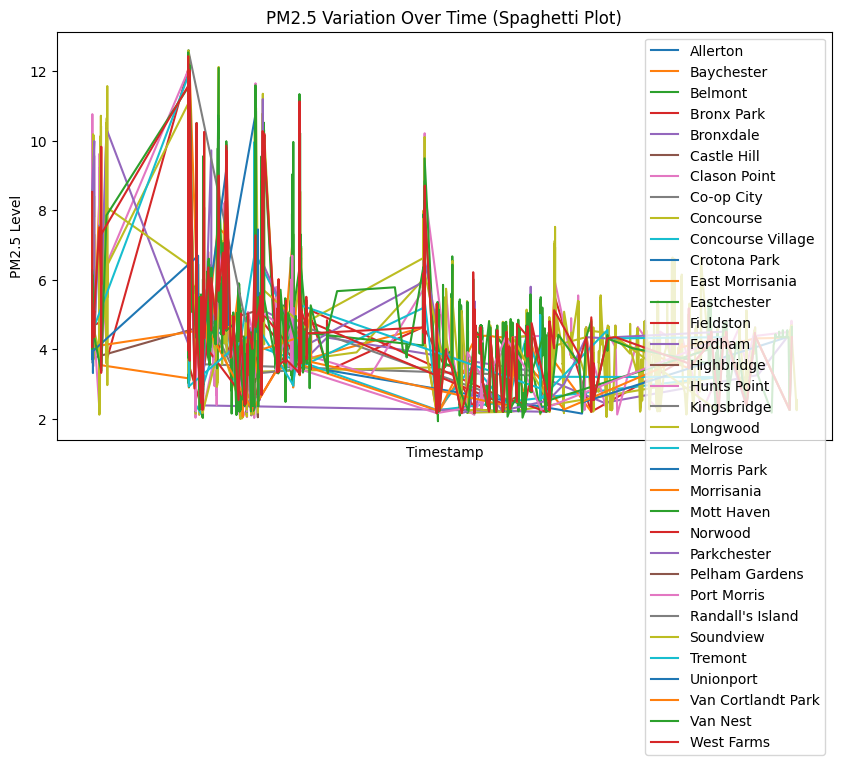

In [141]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Convert 'time' column to datetime format
merged_gdf['time'] = pd.to_datetime(merged_gdf['time'])

# Plotting air quality data over time for each neighborhood
fig, ax = plt.subplots(figsize=(10, 6))
for neighborhood, group in merged_gdf.groupby('neighborhood_AQ'):
    group.plot(ax=ax, x='time', y='pm25', label=neighborhood, kind='line')
plt.xlabel('Timestamp')
plt.ylabel('PM2.5 Level')
plt.title('PM2.5 Variation Over Time (Spaghetti Plot)')
plt.legend()

plt.show()


PM2.5 Variation Over Time (Spaghetti Plot):
This plot visualizes the variation in PM2.5 levels over time for different neighborhoods. Each line represents a neighborhood, and the plot shows how PM2.5 levels fluctuate across timestamps, allowing for the identification of trends or patterns in air quality changes.

Humidity Variation Over Time (Spaghetti Plot)

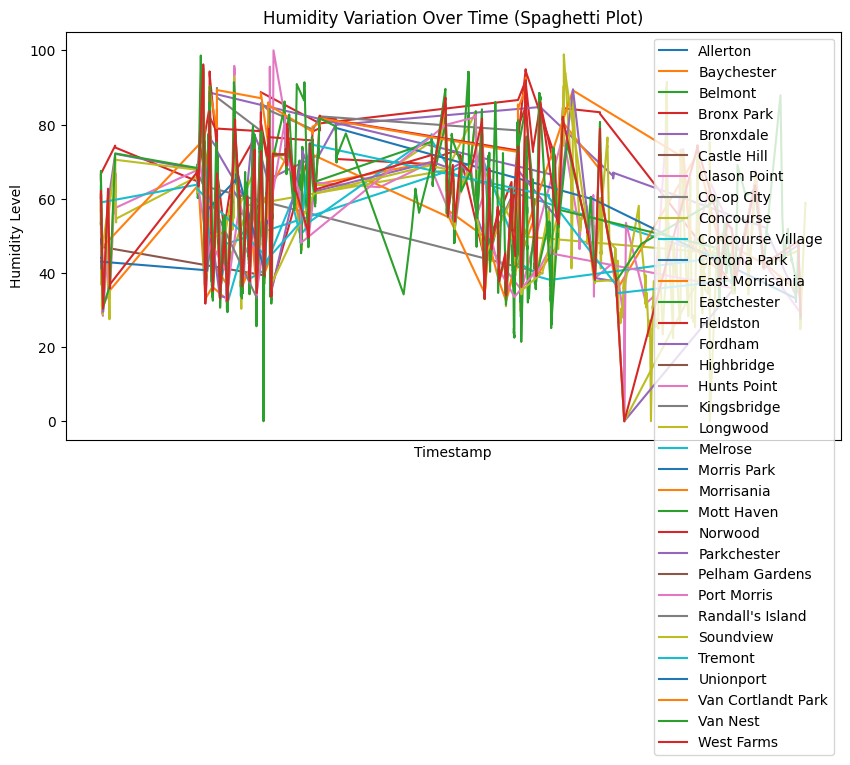

In [142]:
# Plotting air quality data over time for each neighborhood
fig, ax = plt.subplots(figsize=(10, 6))
for neighborhood, group in merged_gdf.groupby('neighborhood_AQ'):
    group.plot(ax=ax, x='time', y='humidity', label=neighborhood, kind='line')
plt.xlabel('Timestamp')
plt.ylabel('Humidity Level')
plt.title('Humidity Variation Over Time (Spaghetti Plot)')
plt.legend()
plt.show()


Humidity Variation Over Time (Spaghetti Plot):
Similar to the PM2.5 plot, this plot illustrates the variation in humidity levels over time across different neighborhoods. Each line corresponds to a neighborhood's humidity levels, providing insights into how humidity fluctuates over timestamps.

Trip Duration Variation Over Time (Spaghetti Plot)

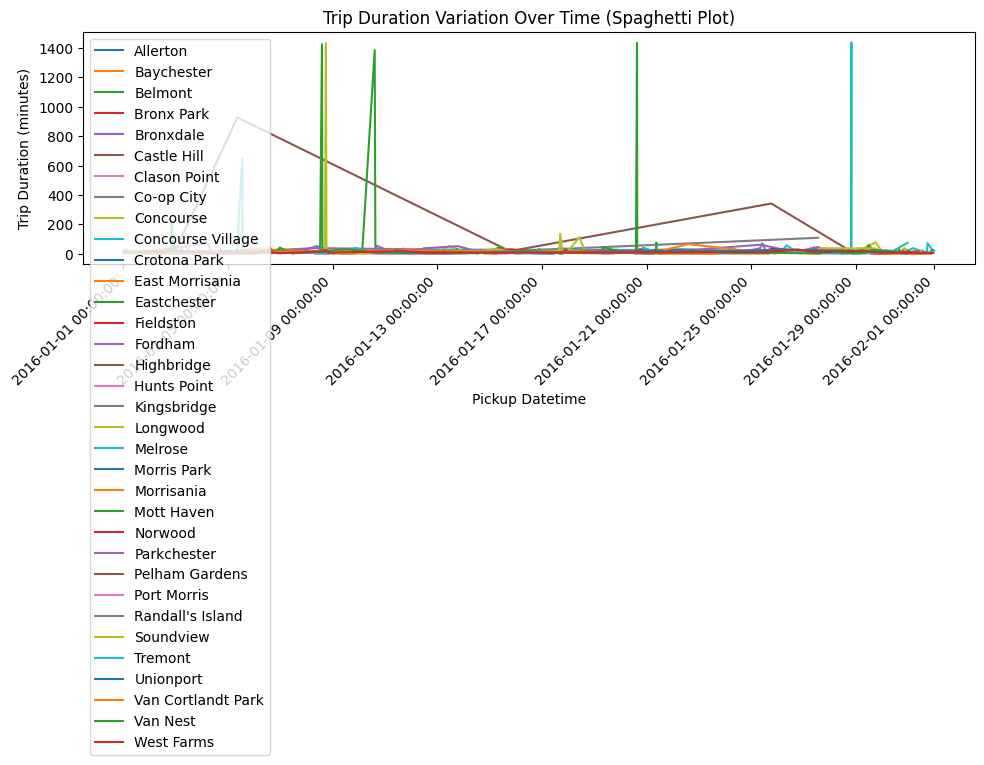

In [143]:
# Convert 'lpep_pickup_datetime' and 'Lpep_dropoff_datetime' columns to datetime format
merged_gdf['lpep_pickup_datetime'] = pd.to_datetime(merged_gdf['lpep_pickup_datetime'])
merged_gdf['Lpep_dropoff_datetime'] = pd.to_datetime(merged_gdf['Lpep_dropoff_datetime'])

# Plotting mobility data over time for each neighborhood
fig, ax = plt.subplots(figsize=(10, 6))
for neighborhood, group in merged_gdf.groupby('neighborhood_mobility'):
    # Calculate the duration of each trip
    group['duration'] = (group['Lpep_dropoff_datetime'] - group['lpep_pickup_datetime']).dt.total_seconds() / 60.0
    group.plot(ax=ax, x='lpep_pickup_datetime', y='duration', label=neighborhood, kind='line')
plt.xlabel('Pickup Datetime')
plt.ylabel('Trip Duration (minutes)')
plt.title('Trip Duration Variation Over Time (Spaghetti Plot)')
plt.legend()

# Customize x-axis tick labels to show time
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
ax.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d %H:%M:%S'))
plt.tight_layout()
plt.show()


Trip Duration Variation Over Time (Spaghetti Plot):
This plot focuses on mobility data, specifically trip duration, over time for various neighborhoods. Each line represents the duration of trips taken within neighborhoods, helping to understand how trip durations vary across different timestamps and areas.

Trip Duration versus PM2.5 Value using Spaghetti Plot

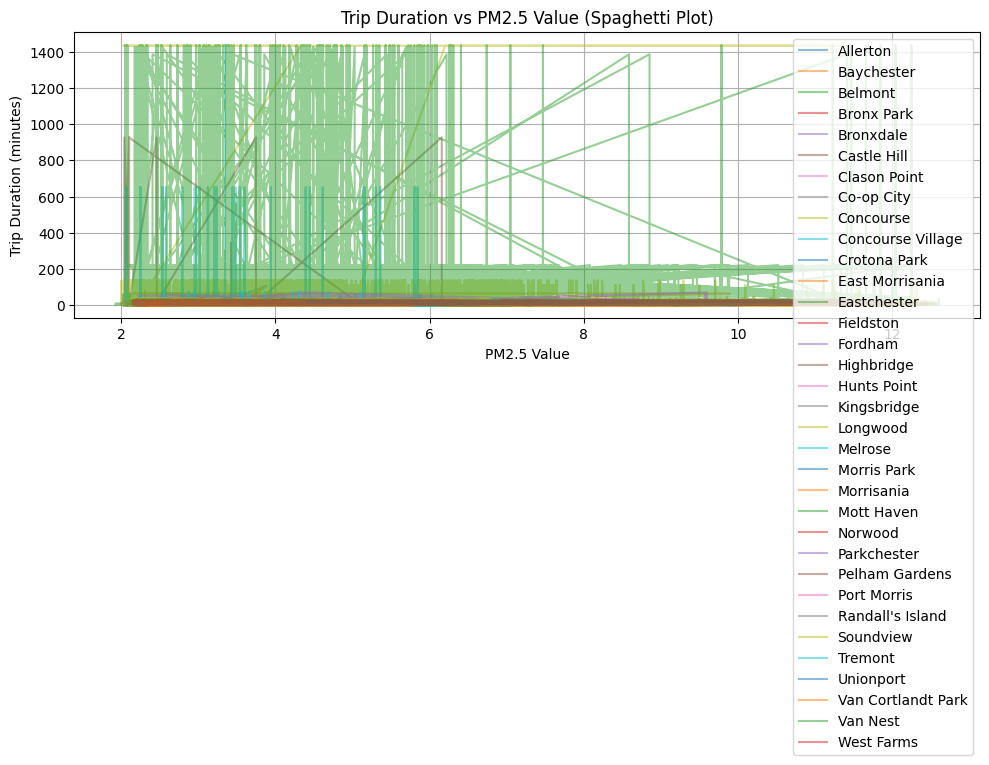

In [146]:
#Convert 'lpep_pickup_datetime' and 'Lpep_dropoff_datetime' columns to datetime format
merged_gdf['lpep_pickup_datetime'] = pd.to_datetime(merged_gdf['lpep_pickup_datetime'])
merged_gdf['Lpep_dropoff_datetime'] = pd.to_datetime(merged_gdf['Lpep_dropoff_datetime'])

# Plotting Trip Duration versus PM2.5 Value using Spaghetti Plot
fig, ax = plt.subplots(figsize=(10, 6))
for neighborhood, group in merged_gdf.groupby('neighborhood_mobility'):
    # Calculate the duration of each trip
    group['duration'] = (group['Lpep_dropoff_datetime'] - group['lpep_pickup_datetime']).dt.total_seconds() / 60.0
    group.plot(ax=ax, x='pm25', y='duration', label=neighborhood, kind='line', alpha=0.5)

plt.xlabel('PM2.5 Value')
plt.ylabel('Trip Duration (minutes)')
plt.title('Trip Duration vs PM2.5 Value (Spaghetti Plot)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Trip Duration versus PM2.5 Value using Spaghetti Plot:
Here, the plot compares trip duration with PM2.5 levels, showing how these two variables are related across different neighborhoods. Each line represents a neighborhood's trips' durations plotted against PM2.5 levels, offering insights into potential correlations or associations between air quality and trip durations.

Trip Duration versus Total Amount using Spaghetti Plot

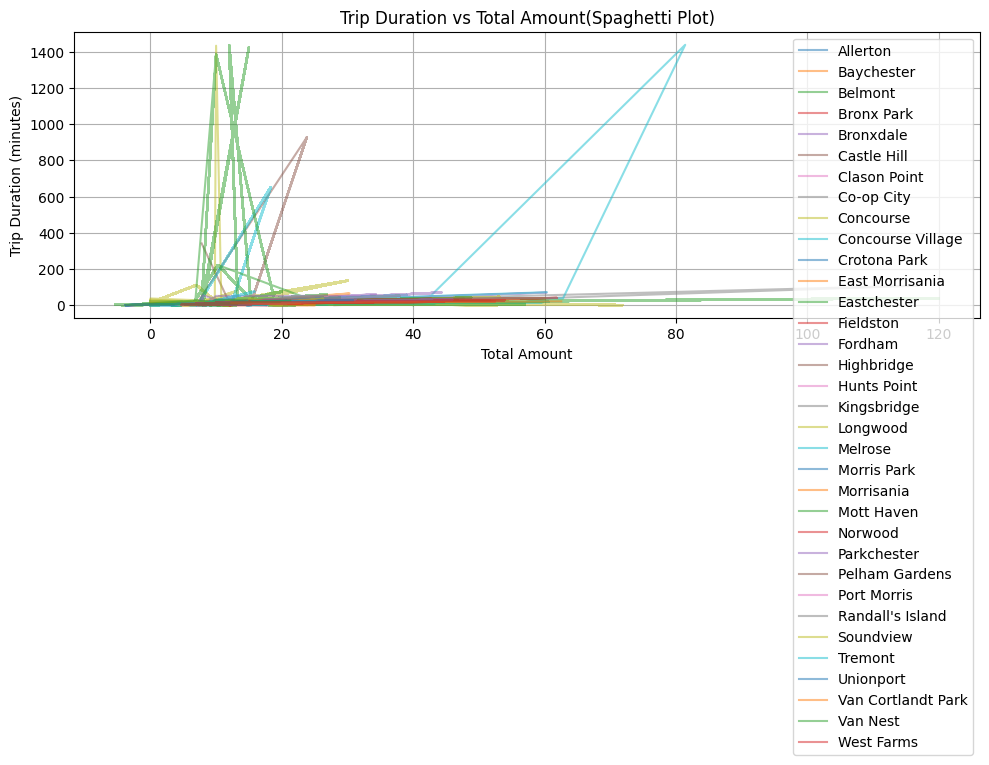

In [148]:
#Convert 'lpep_pickup_datetime' and 'Lpep_dropoff_datetime' columns to datetime format
merged_gdf['lpep_pickup_datetime'] = pd.to_datetime(merged_gdf['lpep_pickup_datetime'])
merged_gdf['Lpep_dropoff_datetime'] = pd.to_datetime(merged_gdf['Lpep_dropoff_datetime'])

# Plotting Trip Duration versus Total Amount using Spaghetti Plot
fig, ax = plt.subplots(figsize=(10, 6))
for neighborhood, group in merged_gdf.groupby('neighborhood_mobility'):
    # Calculate the duration of each trip
    group['duration'] = (group['Lpep_dropoff_datetime'] - group['lpep_pickup_datetime']).dt.total_seconds() / 60.0
    group.plot(ax=ax, x='Total_amount', y='duration', label=neighborhood, kind='line', alpha=0.5)

plt.xlabel('Total Amount')
plt.ylabel('Trip Duration (minutes)')
plt.title('Trip Duration vs Total Amount(Spaghetti Plot)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Trip Duration versus Total Amount using Spaghetti Plot:
This plot examines the relationship between trip duration and the total amount spent, providing insights into how trip durations vary concerning the total cost of trips in different neighborhoods. Each line represents a neighborhood's trip durations plotted against total amounts spent, aiding in understanding mobility patterns and cost factors.

# Testing hypothesis (no significant correlation between the average PM2.5 value and the density of taxi fleet in a specific neighborhood at a given time.)

Null Hypothesis (H0): There is no significant correlation between the average PM2.5 value and the density of taxi fleet in a specific neighborhood at a given time.

Alternative Hypothesis (H1): There is a significant correlation between the average PM2.5 value and the density of taxi fleet in a specific neighborhood at a given time.

In [149]:
from scipy.stats import pearsonr
import statsmodels.api as sm

# Calculate the average PM2.5 value for each neighborhood
average_PM25 = merged_data.groupby('neighborhood_AQ')['pm25'].mean().reset_index()
average_PM25.head()


,neighborhood_AQ,pm25
0,Allerton,2.914269
1,Baychester,3.355503
2,Belmont,4.311103
3,Bronx Park,3.727151
4,Bronxdale,3.812722


In [150]:
# Calculate the number of taxi trips in each neighborhood
taxi_density = merged_data.groupby('neighborhood_mobility').size().reset_index(name='taxi_density')
taxi_density.head()

,neighborhood_mobility,taxi_density
0,Allerton,27
1,Baychester,1
2,Belmont,2
3,Bronx Park,147
4,Bronxdale,217


observed_statistics: Calculate the observed test statistic, which is the Pearson correlation coefficient between the average PM2.5 values (average_PM25['pm25']) and the taxi density (taxi_density['taxi_density']).

In [151]:
# Calculate the observed test statistic (Pearson correlation coefficient) between average PM2.5 and taxi density
observed_statistics, _ = pearsonr(average_PM25['pm25'], taxi_density['taxi_density'])

Generate simulated test statistics under the null hypothesis by permuting the average PM2.5 values (permuted_pm25) and calculating the Pearson correlation coefficient (permuted_corr) for each permutation. This simulates the scenario where there is no true correlation between PM2.5 and taxi density.

In [152]:
# Simulate test statistic under null hypothesis
num_simulations = 1000
null_test_statistics = []

for _ in range(num_simulations):
    permuted_pm25 = np.random.permutation(average_PM25['pm25'])
    permuted_corr, _ = pearsonr(permuted_pm25, taxi_density['taxi_density'])
    null_test_statistics.append(permuted_corr)
print("Simulated test statistics: ", null_test_statistics)

# Calculate the p-value
p_value = np.sum(np.abs(null_test_statistics) >= np.abs(observed_statistics)) /num_simulations

Simulated test statistics:  [0.1154959258707961, 0.0058917760155127764, 0.08791864243110319, -0.13155246105977572, -0.07658677915001101, -0.061268199220501786, -0.0951628719073062, -0.1659428812516477, -0.19626318297416115, -0.08842972664817084, -0.1460334473154758, 0.054612680514266605, 0.4017647168356482, 0.10847203561790694, 0.02104390984569783, -0.2744679298977966, -0.028614264590409322, 0.03339863335398572, -0.0592919351955115, 0.03194798874610305, 0.6393710605089146, 0.5654342867578436, -0.1161635185257349, 0.1460798688247597, 0.03900648542262946, -0.14158478554534523, -0.06580876894243991, 0.007732162765248416, -0.019691550814905208, -0.049771882252936286, 0.08789148809588491, 0.09405352601988713, 0.03219603221130548, 0.007471010405736615, -0.0995676694121101, -0.015945488750800527, 0.11866616633428692, 0.11390376109180624, 0.02909467788110604, 0.133329006566583, 0.129586729636162, 0.0750928791338283, -0.04392497728714117, -0.13941799737467556, -0.023073433018245278, -0.13708813

Calculate the p-value by comparing the absolute values of the simulated test statistics (null_test_statistics) with the absolute value of the observed test statistic (observed_statistics).
If the p-value is less than the significance level (e.g., 0.05), reject the null hypothesis and conclude that there is a significant correlation between PM2.5 and taxi density. Otherwise, fail to reject the null hypothesis.

In [153]:
# Make decision regarding the hypothesis based on the p-value
significance_level = 0.05
if p_value < significance_level:
    print("Reject Null Hypothesis (H0)")
else:
    print("Fail to Reject Null Hypothesis (H0)")

Fail to Reject Null Hypothesis (H0)


# Regression Model

In [156]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
!pip install geohash2
import geohash2 as gh

  Preparing metadata (setup.py) ... done
  Created wheel for geohash2: filename=geohash2-1.1-py3-none-any.whl size=15544 sha256=be3a8066a4ebcd165a60298ad9500605ec5f151c3459fd3eb85cbf56648ab5ee
  Stored in directory: /root/.cache/pip/wheels/c0/21/8d/fe65503f4f439aef35193e5ec10a14adc945e20ff87eb35895
Successfully built geohash2


In [159]:
# Encode geohash into numerical values based on latitude
merged_data['geohash_numeric'] = merged_data['geohash_AQ'].apply(lambda x: gh.decode(x)[1])  # Using latitude for simplicity

# Display the updated DataFrame
print(merged_data[['geohash_AQ', 'geohash_numeric']])



      geohash_AQ geohash_numeric
0         dr72ju           -73.9
1         dr72ju           -73.9
2         dr72ju           -73.9
3         dr72ju           -73.9
4         dr72ju           -73.9
...          ...             ...
29683     dr72r1           -73.9
29684     dr72r1           -73.9
29685     dr72r9           -73.8
29686     dr72qu           -73.9
29687     dr72qz           -73.9

[143786 rows x 2 columns]


In [169]:
taxi_density = merged_data.groupby('neighborhood_mobility').size().reset_index(name='taxi_density')

# Split data into features (X) and target variable (y)
X = merged_data[['taxi_density', 'geohash_numeric']]
y = merged_data['pm25']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
r_squared = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print(f"R-squared: {r_squared}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")


R-squared: 0.0009833251492609163
Mean Squared Error: 2.8001755997656903
Root Mean Squared Error: 1.6733725227114524


In [170]:
# Make predictions on new data
new_taxi_density = 100  # Example taxi density for prediction
new_geohash_numeric = gh.decode('dr72ju')[1]  # Example geohash numeric value for prediction

# Create a DataFrame with the new data for prediction
new_data = pd.DataFrame({'taxi_density': [new_taxi_density], 'geohash_numeric': [new_geohash_numeric]})

# Make predictions
predicted_pm25 = model.predict(new_data)

print("Predicted PM2.5 value:", predicted_pm25[0])

Predicted PM2.5 value: 4.354840265638362


We implemented a linear regression model to predict PM2.5 levels based on taxi density and geohash numeric values. It encodes geohash values into numerical representations using latitude information. The dataset is then grouped by neighborhood mobility to calculate taxi density.

 The data is split into training and testing sets, and features (taxi density and geohash numeric) are defined along with the target variable (PM2.5).

 A Linear Regression model is built and trained using the training data, followed by making predictions on the testing set to evaluate the model's performance using metrics such as R-squared, mean squared error (MSE), and root mean squared error (RMSE).

The code also demonstrates how to use the trained model for predictions on new data by providing examples of taxi density and geohash numeric values and predicting the corresponding PM2.5 value.